## Pump it Up: Data Mining the Water Table



### Summary

Using data from Taarifa and the Tanzanian Ministry of Water, can you predict which pumps are functional, which need some repairs, and which don't work at all? This is an intermediate-level practice competition. Predict one of these three classes based on a number of variables about what kind of pump is operating, when it was installed, and how it is managed. A smart understanding of which waterpoints will fail can improve maintenance operations and ensure that clean, potable water is available to communities across Tanzania.

## Features from Dataset:

Provided features are:

*   **amount_tsh** - Total static head (amount water available to waterpoint)
*   **date_recorded** - The date the row was entered
*   **funder** - Who funded the well
*   **gps_height** - Altitude of the well
*   **installer** - Organization that installed the well
*   **longitude** - GPS coordinate
*   **latitude** - GPS coordinate
*   **wpt_name** - Name of the waterpoint if there is one
*   **num_private** - Private number
*   **basin** - Geographic water basin
*   **subvillage** - Geographic location
*   **region** - Geographic location
*   **region_code** - Geographic location (coded)
*   **district_code** - Geographic location (coded)
*   **lga** - Geographic location
*   **ward** - Geographic location
*   **population** - Population around the well
*   **public_meeting** - True/False
*   **recorded_by** - Group entering this row of data
*   **scheme_management** - Who operates the waterpoint
*   **scheme_name** - Who operates the waterpoint
*   **permit** - If the waterpoint is permitted
*   **construction_year** - Year the waterpoint was constructed
*   **extraction_type** - The kind of extraction the waterpoint uses
*   **extraction_type_group** - The kind of extraction the waterpoint uses
*   **management** - How the waterpoint is managed
*   **management_group** - How the waterpoint is managed
*   **payment** - What the water costs
*   **payment_type** - What the water costs
*   **water_quality** - The quality of the water
*   **quality_group** - The quality of the water
*   **quantity** - The quantity of water
*   **quantity_group** - The quantity of water
*   **source** - The source of the water
*   **source_type** - The source of the water
*   **source_class** - The source of the water
*   **waterpoint_type** - The kind of waterpoint
*   **waterpoint_type_group** - The kind of waterpoint

## Project Pipeline

+ **Import libraries and load the dataset:** In this step, we load the neccesary libraries and import the datasets.
+ **Data Cleaning:** In this analysis, all features are thoroughly examined and appropriate actions are implemented to address missing values, rectify errors, eliminate redundant features, and apply requisite transformations. Each feature is a column, we went through all columns from colum 1 to 38.
+ **Feature Engineering:** The emergence of novel traits occurs through the amalgamation of preexisting elements.
+ **Exploration:** The analysis focuses on examining the relationship between many intriguing variables and the status group.
+ **Modelling:** Here we tested different models: Random Forest, KNN, and XGBoost.
+ **Hyperparameter tuning:** Parameters of Random Rorest and XGBoost are tuned by means of iterated random searches.
+ **Best Score Overall:** Based on random forest after parameter tuning.

## Import libraries and load the dataset

In [ ]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import warnings

# Settings
warnings.filterwarnings('ignore')
sns.set_style("darkgrid")
%matplotlib inline

# Display options
pd.options.display.max_columns = 50
pd.options.display.max_rows = 10

import os
from os.path import curdir


In [ ]:
from google.colab import files
import io
import pandas as pd

# Upload files
uploaded_files = files.upload()

# Check if a file with a similar name is in the uploaded files
test_file_key = next((key for key in uploaded_files.keys() if 'TEST set values' in key), None)

if test_file_key is not None:
    test_data = pd.read_csv(io.BytesIO(uploaded_files[test_file_key]), header=0, sep=",")
    # Continue with your processing using test_data
else:
    print("File 'TEST set values.csv' not found in the uploaded files.")


Saving TEST set values.csv to TEST set values (5).csv


In [ ]:
from google.colab import files
import io
import pandas as pd

# Upload files
uploaded_files = files.upload()

# Check if a file with a similar name is in the uploaded files
train_file_key = next((key for key in uploaded_files.keys() if 'Training set values' in key), None)

if train_file_key is not None:
    try:
        train_data = pd.read_csv(io.BytesIO(uploaded_files[train_file_key]), header=0, sep=",")
        print("File loaded successfully.")
    except pd.errors.EmptyDataError:
        print("Error: The file appears to be empty.")
    except pd.errors.ParserError:
        print("Error: Failed to parse the CSV file.")
else:
    print("Error: File 'Training set values.csv' not found in the uploaded files.")


Saving Training set values.csv to Training set values (3).csv
File loaded successfully.


In [ ]:
from google.colab import files
import io
import pandas as pd

# Upload files
uploaded_files = files.upload()

# Print uploaded file keys
print("Uploaded file keys:", uploaded_files.keys())

# Check if a file with a similar name is in the uploaded files
train_labels_file_key = next((key for key in uploaded_files.keys() if 'Training set labels' in key), None)

if train_labels_file_key is not None:
    try:
        train_labels = pd.read_csv(io.BytesIO(uploaded_files[train_labels_file_key]), header=0, sep=",")
        print("File loaded successfully.")
    except pd.errors.EmptyDataError:
        print("Error: The file appears to be empty.")
    except pd.errors.ParserError:
        print("Error: Failed to parse the CSV file.")
else:
    print("Error: File 'Training set labels.csv' not found in the uploaded files.")


Saving Training set labels.csv to Training set labels (2).csv
Uploaded file keys: dict_keys(['Training set labels (2).csv'])
File loaded successfully.


In [ ]:
# Glance at ds
test_data.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,50785,0.0,2013-02-04,Dmdd,1996,DMDD,35.290799,-4.059696,Dinamu Secondary School,0,Internal,Magoma,Manyara,21,3,Mbulu,Bashay,321,True,GeoData Consultants Ltd,Parastatal,NaN,True,2012,other,other,other,parastatal,parastatal,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,other,other
1,51630,0.0,2013-02-04,Government Of Tanzania,1569,DWE,36.656709,-3.309214,Kimnyak,0,Pangani,Kimnyak,Arusha,2,2,Arusha Rural,Kimnyaki,300,True,GeoData Consultants Ltd,VWC,TPRI pipe line,True,2000,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe
2,17168,0.0,2013-02-01,NaN,1567,NaN,34.767863,-5.004344,Puma Secondary,0,Internal,Msatu,Singida,13,2,Singida Rural,Puma,500,True,GeoData Consultants Ltd,VWC,P,NaN,2010,other,other,other,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,other,other
3,45559,0.0,2013-01-22,Finn Water,267,FINN WATER,38.058046,-9.418672,Kwa Mzee Pange,0,Ruvuma / Southern Coast,Kipindimbi,Lindi,80,43,Liwale,Mkutano,250,NaN,GeoData Consultants Ltd,VWC,NaN,True,1987,other,other,other,vwc,user-group,unknown,unknown,soft,good,dry,dry,shallow well,shallow well,groundwater,other,other
4,49871,500.0,2013-03-27,Bruder,1260,BRUDER,35.006123,-10.950412,Kwa Mzee Turuka,0,Ruvuma / Southern Coast,Losonga,Ruvuma,10,3,Mbinga,Mbinga Urban,60,NaN,GeoData Consultants Ltd,Water Board,BRUDER,True,2000,gravity,gravity,gravity,water board,user-group,pay monthly,monthly,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe


In [ ]:
train_data.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [ ]:
train_labels.head()

,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional


In [ ]:
# check if the train and test sets have the same numer of columns?
len(train_data.columns) == len(test_data.columns)

True

In [ ]:
# merge the train and test set before cleaning and transforming the data
all_data = train_data.append(test_data)

# check if the merge is correct?
len(all_data) == (len(train_data)+len(test_data))

True

In [ ]:
# Check label distribution
train_labels.groupby(['status_group']).size()

status_group
functional                 32259
functional needs repair     4317
non functional             22824
dtype: int64

## Data Cleaning

In [ ]:
# View all column names
list(all_data)

['id',
 'amount_tsh',
 'date_recorded',
 'funder',
 'gps_height',
 'installer',
 'longitude',
 'latitude',
 'wpt_name',
 'num_private',
 'basin',
 'subvillage',
 'region',
 'region_code',
 'district_code',
 'lga',
 'ward',
 'population',
 'public_meeting',
 'recorded_by',
 'scheme_management',
 'scheme_name',
 'permit',
 'construction_year',
 'extraction_type',
 'extraction_type_group',
 'extraction_type_class',
 'management',
 'management_group',
 'payment',
 'payment_type',
 'water_quality',
 'quality_group',
 'quantity',
 'quantity_group',
 'source',
 'source_type',
 'source_class',
 'waterpoint_type',
 'waterpoint_type_group']

In [ ]:
# count all NAs from all column
all_data.isnull().sum().sort_values(ascending=False)[:10]

scheme_name          35258
scheme_management     4846
installer             4532
funder                4504
public_meeting        4155
permit                3793
subvillage             470
management_group         0
waterpoint_type          0
extraction_type          0
dtype: int64

Few variables have NAs, let's go through each of the variables to spot some other possible problems

In [ ]:
# Subvillage

# top 10 subvillages, we will DROP it as tooooo many unique names
all_data.groupby(['subvillage'])['id'].count().sort_values(ascending=False)[:10]

subvillage
Shuleni       646
Majengo       631
Madukani      629
Kati          467
Mtakuja       322
Sokoni        294
M             243
Muungano      215
Mbuyuni       210
Songambele    194
Name: id, dtype: int64

In [ ]:
# Column 1: Amount tsh

# Some significant values:
print('max:',all_data.amount_tsh.max())
print('min:',all_data.amount_tsh.min())
print('mean:',all_data.amount_tsh.mean())
print('median:',all_data.amount_tsh.median())

max: 350000.0
min: 0.0
mean: 318.6857043771044
median: 0.0


<Axes: xlabel='amount_tsh', ylabel='Density'>

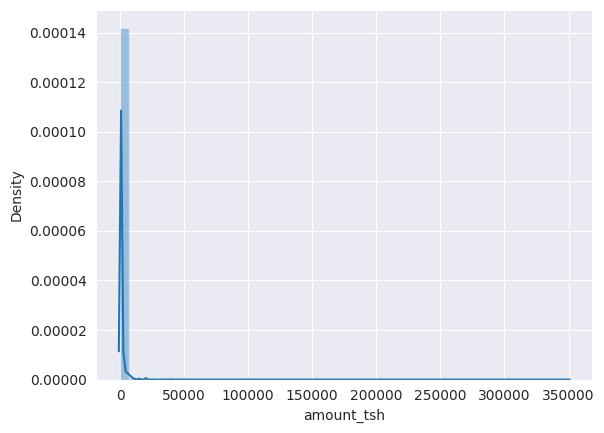

In [ ]:
# Visualize the distribution
sns.distplot(all_data.amount_tsh)

In [ ]:
# There are many zeros, thus we drop the column
all_data = all_data.drop('amount_tsh', axis=1)

In [ ]:
# Column 2: Date recorded

# Glance at the first few items
all_data.date_recorded[:10]

0    2011-03-14
1    2013-03-06
2    2013-02-25
3    2013-01-28
4    2011-07-13
5    2011-03-13
6    2012-10-01
7    2012-10-09
8    2012-11-03
9    2011-08-03
Name: date_recorded, dtype: object

In [ ]:
# We need to split each entry into year and month
all_data['year_recorded'] = all_data.date_recorded.str.slice(0,4)
all_data['month_recorded'] = all_data.date_recorded.str.slice(5,7)

# Convert to integer
all_data.year_recorded = all_data.year_recorded.astype('float', errors='ignore')
all_data.month_recorded = all_data.month_recorded.astype('float', errors='ignore')

# Drop the date column
all_data = all_data.drop('date_recorded', axis=1)

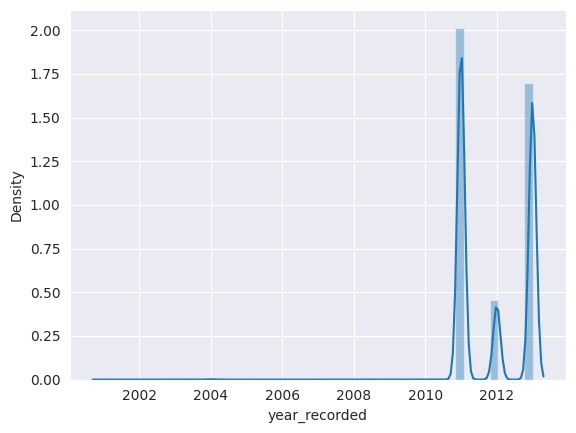

In [ ]:
# Visualize distribution
sns.distplot(all_data.year_recorded);

In [ ]:
all_data.groupby(['year_recorded'])['id'].count()

year_recorded
2001.0        1
2002.0        1
2004.0       41
2011.0    35908
2012.0     8089
2013.0    30210
Name: id, dtype: int64

In [ ]:
# We suspect 2001, 2002 and 2004 are errors
all_data.loc[all_data.year_recorded == 2001.0, 'year_recorded'] = 2011
all_data.loc[all_data.year_recorded == 2002.0, 'year_recorded'] = 2012
all_data.loc[all_data.year_recorded == 2004.0, 'year_recorded'] = 2014

<Axes: xlabel='year_recorded', ylabel='Density'>

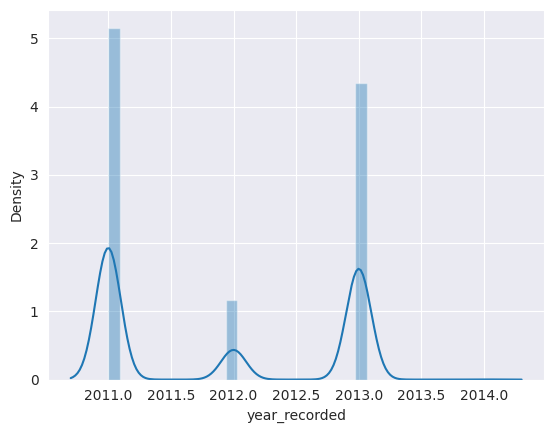

In [ ]:
# Visualize the new distribution
sns.distplot(all_data.year_recorded)

In [ ]:
# Column 3:  Funder
all_data.groupby(['funder']).size().sort_values(ascending=False)[:10]

funder
Government Of Tanzania    11299
Danida                     3907
Hesawa                     2782
Rwssp                      1703
World Bank                 1701
Kkkt                       1623
World Vision               1562
Unicef                     1324
Tasaf                      1136
Dhv                        1065
dtype: int64

In [ ]:
# Impute these as 'other'
all_data.funder.fillna('other', inplace=True)

In [ ]:
#Group high-Cardinality Categorical Features

all_data['funder'].replace(to_replace = ('Government Of Tanzania','Government /tassaf','Government Of Misri','Government Of Egypt','Tanzania','Tanzanian Government','Tanzania /egypt','Government /sda',
                                         'Government/ World Bank','Government And Community','Government/tassaf','Government/tassaf','Government /sda','Government Of Tanzania','Government /government',
                                         'Government/government','Government/tassaf','Government/ Community','Government /dwe','Government And Community','Tanzania Egypt Technical Cooper','Halmashauri Ya Wilaya Sikonge',
                                         'Halmashauri Ya Manispa Tabora','Halmashauri Wil','Halmashauri','Halmashauli','Halmashauri Ya Wilaya','Halmashauri Ya Wilaya','Halmashauri Wilaya','Halmashauri Ya Wilaya',
                                         'Halmashauri Ya Wilaya','Halmashauri Ya Wilaya','Government Of Tanzania','District Council','Ministry Of Water','Dwe','Netherlands','Lga','Jaica','Ces(gmbh)',
                                         'Shipo','Dh','Germany','Go','Mkinga District Council','Unicef','Unicef/central','Unicef/cspd','Unice/ Cspd','Unicef/ Csp','Unicef/undp','Unicef','Villagers','Village Council',
                                         'Village Council','Village Council/ Haydom Luther','Village Council/ Rose Kawala','Village Government','Village Res','Village Office','Village Community','Village','Subvillage','Villagers',
                                         'Vgovernment','Villagers Mpi','Villagers','Villagers','Community','Community Bank','Community Water Project','Community Water Fund','Community','Local','Local','Community Construction Fund'),
                                            value ='Government and Agencies' , inplace=True)

all_data['funder'].replace(to_replace = ('Rc Church','Rc Church/centr','Rcchurch/cefa','Caritas','Cefa/rcchurch','Kkkt Church','Roman','Rc Churc','Roman Catholic','Anglican Church',
                                         'Kanisa Katoliki','Kanisa La Menonite','Pentecosta Church','Catholic Church','Roman Catholic Same','Roman Cathoric Same','Roman Cathoric -kilomeni','Catholic',
                                         'Roman Cathoric Church','Roman Ca','Rc Missionary','Roman Cathoric','Catholic Church Of Disciples','Roman Catholic Rulenge Diocese','Roman Church','Catholic Church Kkkt',
                                         'Romam Catholic','Roman Catholic','Catholic Church','Roman Cathoric Church','Roman Catholic Diocese','Catholic Church/ces','Roman Catholic - Songea Diocese','Rc','Roman',
                                         'Kkkt','Rc Church','Mission','Anglican Church','Roman Catholic'),
                                            value ='Churches and religious institutions' , inplace=True)

all_data['funder'].replace(to_replace = ('World Vision','Plan International','Concern World Wide','Action Aid','Oxfam','World Vision/ Kkkt','Aar','Amref','Care International',
                                         'Concern /govern','Solidame','Solidarm','Farm Africa','Bridge North','Save The Rain Usa','Rotary Club','Rotary Club Australia','Rotary Club Of Chico And Moshi',
                                         'Grail Mission Kiseki Bar','Global Fund','Overnment','Ecumenical Support To Africa','Gospel Power Ministry','Human Relief Foundation','Bread For The Worl','Danida','Hesawa',
                                         'Rwssp','World Vision','Tasaf','Dhv','Norad','Tcrs','Amref','Oxfam','Wateraid','Isf','Rudep','Private','Adra','Jica','Finw','Ded','Plan Int','Oxfarm',
                                         'Concern World Wide','Unhcr','Swedish','African','Is','He','Ki','Ir','Wananchi','Snv','Wua','Unice','Bsf','Co','Lamp','Concern','Muwsa'),
                                            value ='NGOs' , inplace=True)

all_data['funder'].replace(to_replace = ('Unhcr','Unhcr/danida','World Bank/government','World Bank','World Bank/government',
                                         'World Bank/wfp','World Bank/govt','World Bank/government','World Bank/mtn','World Bank/dfid','World Bank/petsa','World Bank / Lgcp','World Bank/petsa','World Bank/mtn',
                                         'World Bank/ Tassaf','World Bank/gov','World Bank/govern','World Bank/rla','World Bank /pct','World Bank/germany','World Bank/fedeco','World Bank','Germany Republi','Adb',
                                         'Fini Water','Dmdd','W.B','Ces (gmbh)','Dfid','Rural Water Supply And Sanitat','Kiliwater'),
                                            value ='Companies and Enterprises' , inplace=True)

all_data['funder'].replace(to_replace = ('Water','Hifab','Wsdp','Lawatefuka Water Supply','Magadini-makiwaru Water','Fw','Kkkt_makwale','Lvia','Tardo','Ru','Halmashauri Ya Wilaya Sikonge','Hsw','Friends Of Kibara Foundation',
                                         'Friends Of Kibara Foundation'),
                                            value ='Schools and educational institutions' , inplace=True)


In [ ]:
def CombineRareCategories(data, mincount):
   for index, row in pd.DataFrame(data['funder'].value_counts()).iterrows():
      if ( row[0] < mincount):
          data['funder'].replace(index, 'Other2', inplace = True)
      else:
          None
# lets apply this functino to our data with mincount=100
CombineRareCategories(all_data, 100)

all_data[0:10] #lets check the result

,id,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,year_recorded,month_recorded
0,69572,Churches and religious institutions,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,2011.0,3.0
1,8776,Other2,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,2013.0,3.0
2,34310,Other2,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,2013.0,2.0
3,67743,Government and Agencies,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,2013.0,1.0
4,19728,Other2,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,2011.0,7.0
5,9944,Mkinga Distric Coun,0,DWE,39.172796,-4.765587,Tajiri,0,Pangani,Moa/Mwereme,Tanga,4,8,Mkinga,Moa,1,True,GeoData Consultants Ltd,VWC,Zingibali,True,2009,submersible,submersible,submersible,vwc,user-group,pay per bucket,per bucket,salty,salty,enough,enough,other,other,unknown,communal standpipe multiple,communal standpipe,2011.0,3.0
6,19816,Dwsp,0,DWSP,33.362410,-3.766365,Kwa Ngomho,0,Internal,Ishinabulandi,Shinyanga,17,3,Shinyanga Rural,Samuye,0,True,GeoData Consultants Ltd,VWC,NaN,True,0,swn 80,swn 80,handpump,vwc,user-group,never pay,never pay,soft,good,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump,2012.0,10.0
7,54551,NGOs,0,DWE,32.620617,-4.226198,Tushirikiane,0,Lake Tanganyika,Nyawishi Center,Shinyanga,17,3,Kahama,Chambo,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,nira/tanira,nira/tanira,handpump,wug,user-group,unknown,unknown,milky,milky,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,2012.0,10.0
8,53934,NGOs,0,Water Aid,32.711100,-5.146712,Kwa Ramadhan Musa,0,Lake Tanganyika,Imalauduki,Tabora,14,6,Tabora Urban,Itetemia,0,True,GeoData Consultants Ltd,VWC,NaN,True,0,india mark ii,india mark ii,handpump,vwc,user-group,never pay,never pay,salty,salty,seasonal,seasonal,machine dbh,borehole,groundwater,hand pump,hand pump,2012.0,11.0
9,46144,Other2,0,Artisan,30.626991,-1.257051,Kwapeto,0,Lake Victoria,Mkonomre,Kagera,18,1,Karagwe,Kaisho,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,nira/tanira,nira/tanira,handpump,vwc,user-group,never pay,never pay,soft,good,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,2011.0,8.0


In [ ]:
all_data.groupby(['funder']).size().sort_values(ascending=False)

funder
NGOs                         20966
Government and Agencies      18509
Other2                       13431
Companies and Enterprises     4874
other                         4504
                             ...  
Rc Ch                          103
Undp                           103
Missi                          102
H                              102
Gtz                            102
Length: 26, dtype: int64

<Axes: xlabel='longitude', ylabel='Density'>

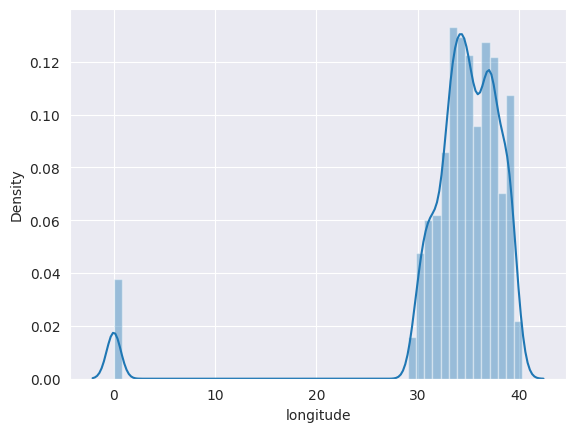

In [ ]:
# Column 4: Longitude
sns.distplot(all_data.longitude)

In [ ]:
# We found some of the data has longitude as zero, must be another error

# Let's set the 0 values to NA
all_data.loc[all_data.longitude == 0, 'longitude'] = np.nan
all_data.longitude.isnull().sum()

2269

In [ ]:
# Impute the missing coordinates with the average longitude of the subvillage they belong to
all_data.longitude.fillna(all_data.groupby(['subvillage'])['longitude'].transform('mean'), inplace=True)
all_data.longitude.isnull().sum()

1410

In [ ]:
# There still exists some NAs, we need to impute them based on the smallest sub-village unit as ward
all_data.longitude.fillna(all_data.groupby(['ward'])['longitude'].transform('mean'), inplace=True)
all_data.longitude.isnull().sum()

37

In [ ]:
# There still exists some errors, thus we keep on imputing by geographical divisions
all_data.longitude.fillna(all_data.groupby(['lga'])['longitude'].transform('mean'), inplace=True)
all_data.longitude.isnull().sum()

0

In [ ]:
# Round longitude to 2 decimals
all_data.longitude = all_data.longitude.round(2)

<Axes: xlabel='longitude', ylabel='Density'>

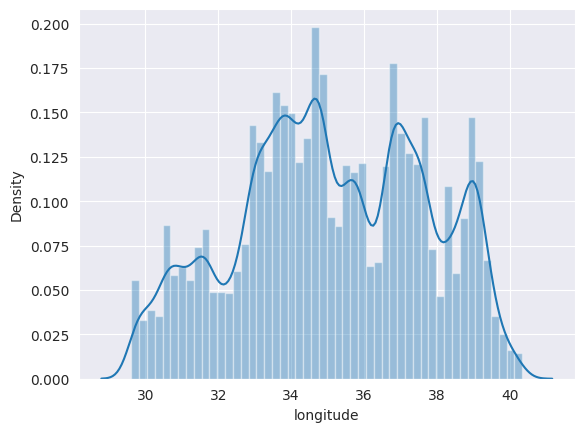

In [ ]:
sns.distplot(all_data.longitude)

<Axes: xlabel='latitude', ylabel='Density'>

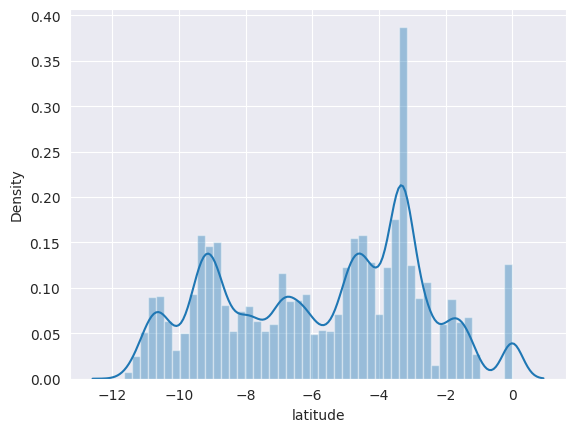

In [ ]:
# Column 5: Latitude

# Round latitude to 2 decimals as longitude
all_data.latitude = all_data.latitude.round(2)

sns.distplot(all_data.latitude)

In [ ]:
# We spot the same issues as longitude and found a few 0. Since Tanzania is below the equator, therefore 0 must be an error
# We set the 0 values to NA

all_data.loc[all_data.latitude == 0, 'latitude'] = np.nan
all_data.latitude.isnull().sum()

2269

In [ ]:
# Impute the missing coordinates with the average latitude of the subvillage they belong
all_data.latitude.fillna(all_data.groupby(['subvillage'])['latitude'].transform('mean'), inplace=True)
all_data.latitude.isnull().sum()

1410

In [ ]:
# Again, we found some NAs, we impute them based on ward
all_data.latitude.fillna(all_data.groupby(['ward'])['latitude'].transform('mean'), inplace=True)
all_data.latitude.isnull().sum()

37

In [ ]:
# we continue to divide them by a smaller division
all_data.latitude.fillna(all_data.groupby(['lga'])['latitude'].transform('mean'), inplace=True)
all_data.latitude.isnull().sum()

0

<Axes: xlabel='latitude', ylabel='Density'>

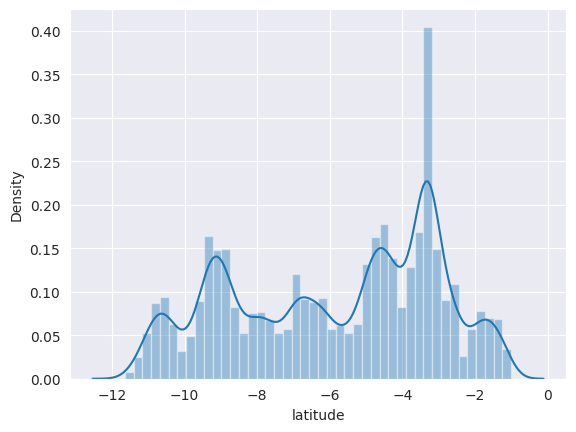

In [ ]:
sns.distplot(all_data.latitude)

<Axes: xlabel='gps_height', ylabel='Density'>

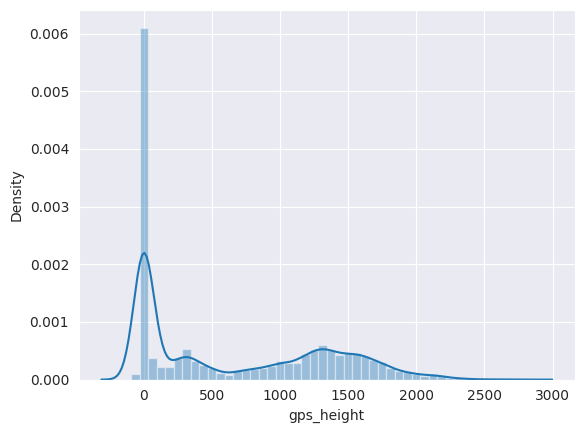

In [ ]:
# Column 6: GPS Height
sns.distplot(all_data.gps_height)

In [ ]:
# Again, we found many zeros, we perform the same method as for latitude and longitude
all_data.loc[all_data.gps_height == 0, 'gps_height'] = np.nan
all_data.gps_height.isnull().sum()

25649

In [ ]:
# subvillage method
all_data.gps_height.fillna(all_data.groupby(['subvillage'])['gps_height'].transform('mean'), inplace=True)
all_data.gps_height.isnull().sum()

19569

In [ ]:
# ward method
all_data.gps_height.fillna(all_data.groupby(['ward'])['gps_height'].transform('mean'), inplace=True)
all_data.gps_height.isnull().sum()

2600

In [ ]:
# lga method
all_data.gps_height.fillna(all_data.groupby(['lga'])['gps_height'].transform('mean'), inplace=True)
all_data.gps_height.isnull().sum()

114

In [ ]:
# region method
all_data.gps_height.fillna(all_data.groupby(['region_code'])['gps_height'].transform('mean'), inplace=True)
all_data.gps_height.isnull().sum()

0

<Axes: xlabel='gps_height', ylabel='Density'>

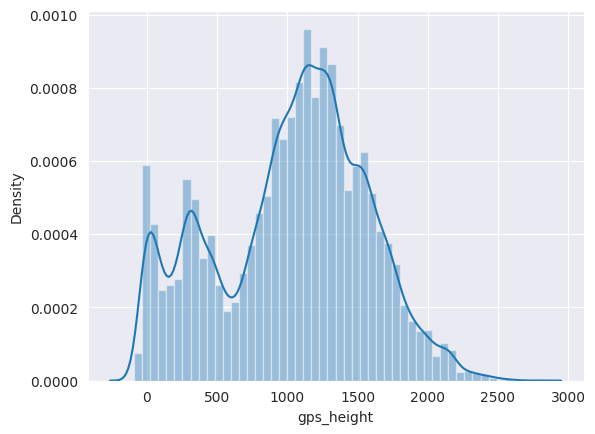

In [ ]:
# Visualize the division and distribution
sns.distplot(all_data.gps_height)

In [ ]:
# Column 7: Installer
all_data.groupby(['installer'])['id'].count().sort_values(ascending=False)

installer
DWE                 21751
Government           2282
RWE                  1498
Commu                1347
DANIDA               1305
                    ...  
MISS                    1
MISHENI                 1
MIAB                    1
METHODIST CHURCH        1
world vision            1
Name: id, Length: 2410, dtype: int64

In [ ]:
# Impute as unknown
all_data.installer.fillna('other', inplace=True)
all_data.installer.isnull().sum()

0

In [ ]:
#Group high-Cardinality Categorical Features

all_data['installer'].replace(to_replace = '-', value ='other' , inplace=True)

all_data['installer'].replace(to_replace = ('UNICEF', 'DANIDA','District council','Central government','Village council','Village government','District water department','TANZANIAN GOVERNMENT','Ministry of water','Ministry of education','Ministry of health',
                                            'District Water Department', 'District water depar','Distric Water Department','COUN', 'District COUNCIL', 'DISTRICT COUNCIL','District Counci','District Council','Council','Counc','District  Council','Distri',
                                            'Central Government','Tanzania Government','central government','Cental Government', 'Cebtral Government','Tanzanian Government','Tanzania government','Centra Government','CENTRAL GOVERNMENT','TANZANIAN GOVERNMENT',
                                            'Central govt','Centr','Centra govt','Central government','Unisef','UNICEF','Unicef','DANID','Danid','DANIDA CO','DANIDA','DANIDS','DWE',
                                            'villigers', 'villager', 'Villagers', 'Villa', 'Village', 'Villi','Village Council','Village Counil', 'Villages', 'Vill', 'Village community','Villaers', 'Village Community', 'Villag','Villege Council', 'Village council',
                                            'Village  Council','Villagerd', 'Villager', 'Village Technician','Village Office','Village community members','VILLIGER','villigerd','VILLIGERS','VILLAGE','VILLAGE COUNCIL Orpha','VILLAGE COUNCIL','VILLAGE COUNCIL .ODA','VILLAG',
                                            'Commu','Communit','commu','COMMU', 'COMMUNITY','GOVERNMENT', 'GOVER', 'GOVERNME', 'GOVERM','GOVERN','Gover','Gove','Governme','Governmen','Colonial Government','Government of Misri','Italy government',
                                            'British colonial government','Concern /government','Village Government','Government and Community','Community','Gover','Sengerema Water Department','Distri'),
                                            value ='Government and Agencies' , inplace=True)

all_data['installer'].replace(to_replace = ('RC Church', 'Anglican Church','Baptists Church','Mosque','Pentecostal Church','Roman Cathoric - Kilomeni','KKKT','Jeshi la wokovu','Christan Outrich',
                                            'RC CHURCH', 'RC Churc', 'RC','RC Ch','RC C', 'RC CH','RC church','RC CATHORIC','RC Church','RWE','KKKT','Cetral government /RC','Dmdd','Norad','TWESA','DA','Idara ya maji','Magadini-Makiwaru wa','KKKT _ Konde and DWE',
                                            'Mission','DDCA','Wizara ya maji','Halmashauri ya wilaya sikonge','Masjid Takuar'),
                                            value ='Churches and religious institutions' , inplace=True)

all_data['installer'].replace(to_replace = ('World Vision', 'A.D.B','CARE International','Plan International','Oxfam','Save the Rain USA','Solidarm','Red Cross','Lutheran World Relief','Grail Mission Kiseki bar','Action Contre La Faim','Active KMK',
                                            'JAICA', 'JAICA CO','World vision', 'World Division','World Vision','WORLD VISION','Government /TCRS','Government/TCRS','ADRA /Government','TCRS','WU','ACRA','SEMA','OXFAM','SHIPO','World Bank','wananchi','RWSSP','JICA',
                                            'ISF','Adra','Artisan','HE','Tardo','Ir','TWE','MUWSA','DED'),
                                            value ='NGOs' , inplace=True)

all_data['installer'].replace(to_replace = ('AQUA TANK CO LTD', 'Cosmos Engineering','Megis','Kalitasi','MORNING CONSTRUCTION','RUDEP','Semaco','Simango Kihengu','Seram','Safina Mohamed','OBC','China Henan Construction','Engarasero villagers','MMG Gold Mine',
                                            'Resolute Mining','Regwa Company of Egypt','FinW','Fini water','FINI WATER','FIN WATER','Fin water','Fin Water','FINN WATER','FinWate','FinWater','Hesawa','HESAWA','Amref','LGA','TASAF','WEDECO','DW','Kiliwater',
                                            'Lawatefuka water sup','FW','Private','Handeni Trunk Main(','Water Aid','World','Consulting Engineer','HSW'),
                                            value ='Companies and Enterprises' , inplace=True)

all_data['installer'].replace(to_replace = ('Kibaha Town Council', 'KKT C','P.N.R.','SHULE YA MSINGI','Shule ya sekondari','Mwl. Nyerere Secondary School','RWE','CES','DH','KUWAIT','DWSP','WVT','MWE','Is'),
                                            value ='Community and Village Organizations' , inplace=True)


In [ ]:
def CombineRareCategories2(data, mincount):
   for index, row in pd.DataFrame(data.value_counts()).iterrows():
      if ( row[0] < mincount):
          data.replace(index, 'Other2', inplace = True)
      else:
          None
# lets apply this functino to our data with mincount=100
CombineRareCategories2(all_data['installer'], 100)

all_data[0:10] #lets check the result

,id,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,year_recorded,month_recorded
0,69572,Churches and religious institutions,1390.000000,Roman,34.94,-9.86,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,2011.0,3.0
1,8776,Other2,1399.000000,Other2,34.70,-2.15,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,2013.0,3.0
2,34310,Other2,686.000000,NGOs,37.46,-3.82,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,2013.0,2.0
3,67743,Government and Agencies,263.000000,Government and Agencies,38.49,-11.16,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,2013.0,1.0
4,19728,Other2,1300.000000,NGOs,31.13,-1.83,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,2011.0,7.0
5,9944,Mkinga Distric Coun,961.744219,Government and Agencies,39.17,-4.77,Tajiri,0,Pangani,Moa/Mwereme,Tanga,4,8,Mkinga,Moa,1,True,GeoData Consultants Ltd,VWC,Zingibali,True,2009,submersible,submersible,submersible,vwc,user-group,pay per bucket,per bucket,salty,salty,enough,enough,other,other,unknown,communal standpipe multiple,communal standpipe,2011.0,3.0
6,19816,Dwsp,896.212121,Community and Village Organizations,33.36,-3.77,Kwa Ngomho,0,Internal,Ishinabulandi,Shinyanga,17,3,Shinyanga Rural,Samuye,0,True,GeoData Consultants Ltd,VWC,NaN,True,0,swn 80,swn 80,handpump,vwc,user-group,never pay,never pay,soft,good,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump,2012.0,10.0
7,54551,NGOs,934.402778,Government and Agencies,32.62,-4.23,Tushirikiane,0,Lake Tanganyika,Nyawishi Center,Shinyanga,17,3,Kahama,Chambo,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,nira/tanira,nira/tanira,handpump,wug,user-group,unknown,unknown,milky,milky,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,2012.0,10.0
8,53934,NGOs,179.000000,Companies and Enterprises,32.71,-5.15,Kwa Ramadhan Musa,0,Lake Tanganyika,Imalauduki,Tabora,14,6,Tabora Urban,Itetemia,0,True,GeoData Consultants Ltd,VWC,NaN,True,0,india mark ii,india mark ii,handpump,vwc,user-group,never pay,never pay,salty,salty,seasonal,seasonal,machine dbh,borehole,groundwater,hand pump,hand pump,2012.0,11.0
9,46144,Other2,854.965385,NGOs,30.63,-1.26,Kwapeto,0,Lake Victoria,Mkonomre,Kagera,18,1,Karagwe,Kaisho,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,nira/tanira,nira/tanira,handpump,vwc,user-group,never pay,never pay,soft,good,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,2011.0,8.0


In [ ]:
all_data.groupby(['installer'])['id'].count().sort_values(ascending=False)

installer
Government and Agencies                31367
Other2                                 13077
Companies and Enterprises               6055
Churches and religious institutions     5546
NGOs                                    5369
                                       ...  
MDRDP                                    104
H                                        102
Water board                              102
CEFA                                     101
Missi                                    101
Name: id, Length: 30, dtype: int64

In [ ]:
# Column 8: wpt_name
all_data.groupby(['wpt_name']).size().sort_values(ascending=False)[1:10]

wpt_name
Shuleni            2183
Zahanati           1034
Msikitini           647
Kanisani            390
Sokoni              328
Bombani             323
Ofisini             321
School              260
Shule Ya Msingi     247
dtype: int64

In [ ]:
# There are too much errors, we drop wpt_name feature
all_data = all_data.drop('wpt_name', axis=1)

<Axes: xlabel='num_private', ylabel='Density'>

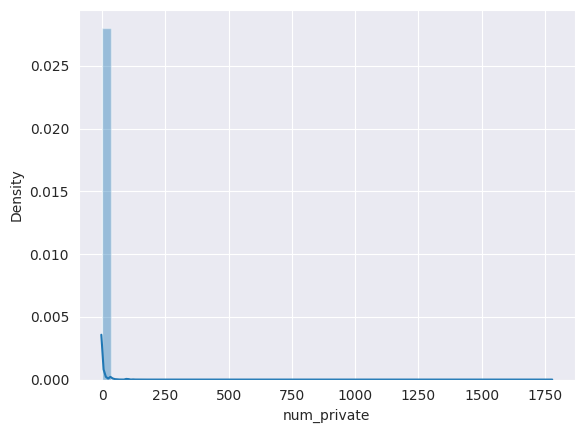

In [ ]:
# Column 9: Num private
sns.distplot(all_data.num_private)

In [ ]:
# Nothing too spectacular , thus we need to drop this feature as well
all_data = all_data.drop('num_private', axis=1)

In [ ]:
# Column 10: Basin
all_data.groupby(['basin']).size()

basin
Internal                    9642
Lake Nyasa                  6332
Lake Rukwa                  3059
Lake Tanganyika             8052
Lake Victoria              12871
Pangani                    11143
Rufiji                      9987
Ruvuma / Southern Coast     5587
Wami / Ruvu                 7577
dtype: int64

In [ ]:
# Column 11: Region
all_data.groupby(['region']).size().sort_values(ascending=False) # Everything good here

region
Iringa           6599
Shinyanga        6293
Mbeya            5758
Kilimanjaro      5494
Morogoro         5038
                 ... 
Rukwa            2242
Mtwara           2144
Manyara          1972
Lindi            1920
Dar es Salaam    1020
Length: 21, dtype: int64

In [ ]:
# Column 12: Region code
all_data.groupby(['region_code']).size().sort_values(ascending=False)[:10] # Everything good here

region_code
11    6608
17    6334
12    5759
3     5494
5     5079
18    4183
19    3824
2     3709
16    3533
10    3306
dtype: int64

In [ ]:
all_data.groupby(['region','region_code']).size()[:10]

region         region_code
Arusha         2              3709
               24              402
Dar es Salaam  7              1020
Dodoma         1              2779
Iringa         11             6599
Kagera         18             4174
Kigoma         16             3533
Kilimanjaro    3              5494
Lindi          8               375
               18                9
dtype: int64

In [ ]:
# Since we suspect that region_code contains more informations, we will drop region column 11
all_data = all_data.drop('region', axis=1)

In [ ]:
# Column 13: District code
all_data.groupby(['district_code']).size().sort_values(ascending=False)[:10]

district_code
1     15299
2     13929
3     12521
4     11253
5      5428
6      5108
7      4166
8      1282
30     1256
33     1063
dtype: int64

In [ ]:
all_data.groupby(['region_code','district_code']).size()[:10]

region_code  district_code
1            0                  27
             1                1107
             3                 460
             4                 439
             5                 467
             6                 279
2            1                 226
             2                1460
             3                 143
             5                 245
dtype: int64

In [ ]:
# Column 14: Lga
all_data.groupby(['lga']).size().sort_values(ascending=False)[:10]

lga
Njombe          3128
Moshi Rural     1566
Arusha Rural    1521
Bariadi         1485
Rungwe          1381
Kilosa          1368
Kasulu          1322
Mbozi           1286
Bagamoyo        1263
Meru            1244
dtype: int64

In [ ]:
all_data.groupby(['region_code', 'lga']).size()[:10]

region_code  lga         
1            Bahi             279
             Chamwino         439
             Dodoma Urban     467
             Kondoa           644
             Kongwa           460
             Mpwapwa          490
2            Arusha Rural    1521
             Arusha Urban      82
             Longido          391
             Meru            1244
dtype: int64

<Axes: xlabel='population', ylabel='Density'>

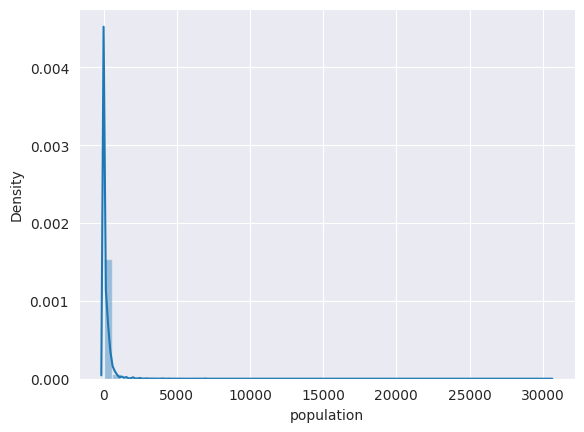

In [ ]:
# Column 15: Population
sns.distplot(all_data.population)

In [ ]:
all_data.groupby(['population']).size().sort_values(ascending=False)[:10]


population
0      26834
1       8782
200     2370
150     2328
250     2087
300     1842
50      1437
100     1419
500     1274
350     1252
dtype: int64

In [ ]:
# We will impute them with averages based on geo information
all_data.loc[all_data.population == 0, 'population'] = np.nan
all_data.population.isnull().sum()

26834

In [ ]:
# subvillage method
all_data.population.fillna(all_data.groupby(['subvillage'])['population'].transform('median'), inplace=True)
all_data.population.isnull().sum()

20376

In [ ]:
# ward method
all_data.population.fillna(all_data.groupby(['ward'])['population'].transform('median'), inplace=True)
all_data.population.isnull().sum()

2860

In [ ]:
# lga method
all_data.population.fillna(all_data.groupby(['lga'])['population'].transform('median'), inplace=True)
all_data.population.isnull().sum()

114

In [ ]:
# region_code method
all_data.population.fillna(all_data.groupby(['region_code'])['population'].transform('median'), inplace=True)
all_data.population.isnull().sum()

0

<Axes: xlabel='population', ylabel='Density'>

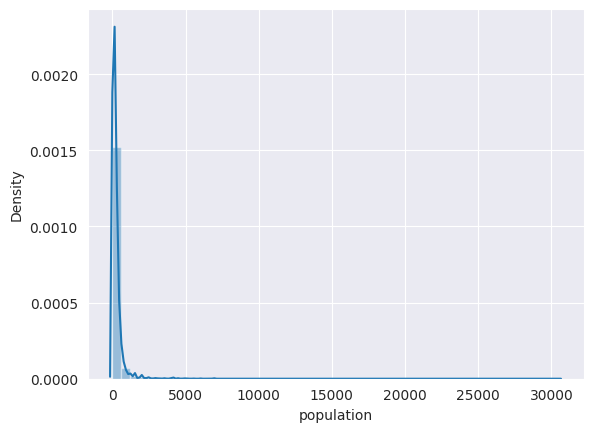

In [ ]:
# Visualize the distribution
sns.distplot(all_data.population)

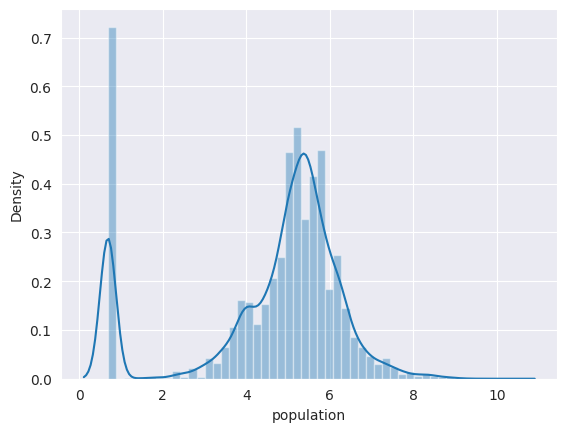

In [ ]:
# The previous looks skewed to the right, thus we want to transform it by taking the log
sns.distplot(np.log1p(all_data.population));

In [ ]:
# Create a new column with log population and drop the original population
all_data['population_log'] = np.log1p(all_data.population)
all_data = all_data.drop('population', axis=1)

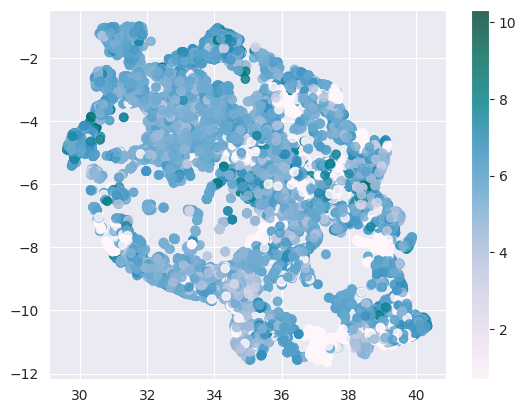

In [ ]:
# Population density by geograohical coordinates
plt.scatter(all_data.longitude, all_data.latitude, alpha = .8, c = all_data.population_log, cmap = 'PuBuGn')
cbar = plt.colorbar()

In [ ]:
# Column 16: Public meeting
all_data.groupby(['public_meeting']).size()

public_meeting
False     6346
True     63749
dtype: int64

In [ ]:
all_data.public_meeting.isnull().sum()

4155

In [ ]:
# Set True to 1 and False to 0 and convert the column into int
all_data.loc[all_data.public_meeting == True, 'public_meeting'] = 1
all_data.loc[all_data.public_meeting == False, 'public_meeting'] = 0
all_data.public_meeting = all_data.public_meeting.astype('int', errors='ignore')
all_data.public_meeting.fillna(2, inplace=True)
all_data.public_meeting.isnull().sum()

0

In [ ]:
# Column 17: Recorded by
all_data.recorded_by.unique()

array(['GeoData Consultants Ltd'], dtype=object)

In [ ]:
# Since there is only one institution recording, we can drop the column
all_data = all_data.drop('recorded_by', axis=1)

In [ ]:
# Column 18: Management
# Impute the NAs as other
#all_data.scheme_management.fillna('other', inplace=True)
all_data.management.isnull().sum()

0

In [ ]:
# Column 19: Scheme management
all_data.groupby(['scheme_management']).size().sort_values(ascending=False)[:10]

scheme_management
VWC                 45917
WUG                  6496
Water authority      3975
WUA                  3551
Water Board          3462
Parastatal           2124
Company              1341
Private operator     1326
Other                 996
SWC                   123
dtype: int64

In [ ]:
all_data.scheme_management.fillna('other', inplace=True)
all_data.scheme_management.isnull().sum()

0

In [ ]:
# Column 20: Scheme name
all_data.groupby(['scheme_name']).size().sort_values(ascending=False)[:10]

scheme_name
K                              858
None                           794
Borehole                       704
Chalinze wate                  501
M                              490
DANIDA                         483
Government                     395
Ngana water supplied scheme    335
wanging'ombe water supply s    323
Bagamoyo wate                  296
dtype: int64

In [ ]:
all_data.groupby(['scheme_management','scheme_name']).size()[:10]

scheme_management  scheme_name              
Company            BFFS                           1
                   BSF water supplying            1
                   Bagamoyo Wate                 76
                   Bagamoyo wate                272
                   Borehole                       1
                   Borehole drilling project      1
                   Bulamba piped scheme           3
                   Burieni water supply           1
                   Doe water supply               4
                   EKTM 2 water  supply           1
dtype: int64

In [ ]:
all_data.groupby(['scheme_management','management']).size()[:10]

scheme_management  management      
Company            company             848
                   other                 2
                   parastatal           30
                   private operator    287
                   vwc                 173
                   wug                   1
None               vwc                   1
Other              other               690
                   parastatal            1
                   private operator     78
dtype: int64

In [ ]:
# The scheme_name feature is messy due to the multiple levels, we can drop this
all_data = all_data.drop('scheme_name', axis=1)


In [ ]:
# Column 21: permit
all_data.groupby(['permit'])['id'].count().sort_values(ascending=False)

permit
True     48606
False    21851
Name: id, dtype: int64

In [ ]:
all_data.permit.fillna('other', inplace=True)
all_data.permit.isnull().sum()

0

<Axes: xlabel='construction_year', ylabel='Density'>

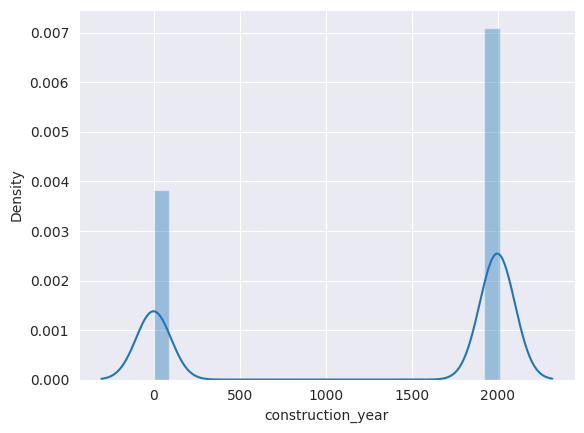

In [ ]:
# Column 22: Construction year
sns.distplot(all_data.construction_year)

In [ ]:
all_data['construction_year'].replace(to_replace = (1960,1961,1962,1963,1964),
                        value ='60s' , inplace=True)
all_data['construction_year'].replace(to_replace = (1965,1966,1967,1968,1969),
                        value ='65s' , inplace=True)
all_data['construction_year'].replace(to_replace = (1970,1971,1972,1973,1974),
                        value ='70s' , inplace=True)
all_data['construction_year'].replace(to_replace = (1975,1976,1977,1978,1979),
                        value ='75s' , inplace=True)
all_data['construction_year'].replace(to_replace = (1980,1981,1982,1983,1984),
                        value ='80s' , inplace=True)
all_data['construction_year'].replace(to_replace = (1985,1986,1987,1988,1989),
                        value ='85s' , inplace=True)
all_data['construction_year'].replace(to_replace = (1990,1991,1992,1993,1994),
                        value ='90s' , inplace=True)
all_data['construction_year'].replace(to_replace = (1995,1996,1997,1998,1999),
                        value ='95s' , inplace=True)
all_data['construction_year'].replace(to_replace = (2000,2001,2002,2003,2004),
                        value ='00s' , inplace=True)
all_data['construction_year'].replace(to_replace = (2005,2006,2007,2008,2009),
                        value ='05s' , inplace=True)
all_data['construction_year'].replace(to_replace = (2010,2011,2012,2013),
                        value ='10s' , inplace=True)

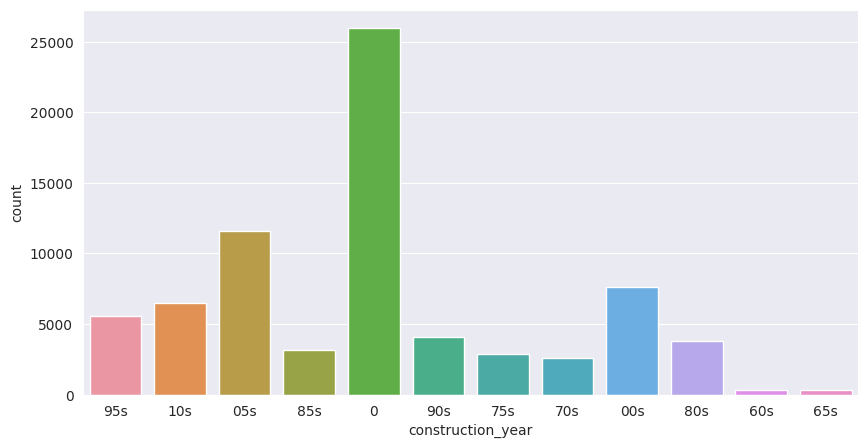

In [ ]:
plt.figure(figsize=(10,5))
ax = sns.countplot(x='construction_year', data=all_data)

In [ ]:
# Column 23: Extraction type
all_data.groupby(['extraction_type','extraction_type_group','extraction_type_class']).size()[:10]

extraction_type  extraction_type_group  extraction_type_class
afridev          afridev                handpump                  2208
cemo             other motorpump        motorpump                  108
climax           other motorpump        motorpump                   41
gravity          gravity                gravity                  33263
india mark ii    india mark ii          handpump                  3029
india mark iii   india mark iii         handpump                   135
ksb              submersible            submersible               1790
mono             mono                   motorpump                 3628
nira/tanira      nira/tanira            handpump                 10205
other            other                  other                     8102
dtype: int64

In [ ]:
# We want to extract only the 'extraction_type_class'
all_data = all_data.drop('extraction_type', axis=1)
all_data = all_data.drop('extraction_type_group', axis=1)
all_data.extraction_type_class.isnull().sum()

0

In [ ]:
# Column 24-25: Payment and payment type
all_data.groupby(['payment','payment_type']).size()

payment                payment_type
never pay              never pay       31712
other                  other            1314
pay annually           annually         4570
pay monthly            monthly         10397
pay per bucket         per bucket      11266
pay when scheme fails  on failure       4842
unknown                unknown         10149
dtype: int64

In [ ]:
# The two features are correlated, thus we can drop payment
all_data = all_data.drop('payment', axis=1)

In [ ]:
# Column 26 27: Water quality and quality_group
all_data.groupby(['water_quality','quality_group']).size()

water_quality       quality_group
coloured            colored            623
fluoride            fluoride           244
fluoride abandoned  fluoride            23
milky               milky             1005
salty               salty             6082
salty abandoned     salty              423
soft                good             63505
unknown             unknown           2345
dtype: int64

In [ ]:
# We can see that water quality contains more information, we drop quality_group
all_data = all_data.drop('quality_group', axis=1)

In [ ]:
# Column 28 29: Quantity and quantity_group
all_data.groupby(['quantity','quantity_group'])['id'].size()

quantity      quantity_group
dry           dry                7782
enough        enough            41522
insufficient  insufficient      18896
seasonal      seasonal           5075
unknown       unknown             975
Name: id, dtype: int64

In [ ]:
# Since the two features are equal, we drop quantity_group
all_data = all_data.drop('quantity_group', axis=1)

In [ ]:
# Column 30: Source
all_data.groupby(['source','source_type','source_class']).size()

source                source_type           source_class
dam                   dam                   surface           840
hand dtw              borehole              groundwater      1108
lake                  river/lake            surface           950
machine dbh           borehole              groundwater     13822
other                 other                 unknown           261
rainwater harvesting  rainwater harvesting  surface          2863
river                 river/lake            surface         11964
shallow well          shallow well          groundwater     21140
spring                spring                groundwater     21216
unknown               other                 unknown            86
dtype: int64

In [ ]:
# Source and source_type are very similar, we select to keep source and drop source_type
all_data = all_data.drop('source_type', axis=1)
all_data = all_data.drop('source_class', axis=1)

In [ ]:
# Column 31 32: Water point type
all_data.groupby(['waterpoint_type','waterpoint_type_group']).size()

waterpoint_type              waterpoint_type_group
cattle trough                cattle trough              150
communal standpipe           communal standpipe       35628
communal standpipe multiple  communal standpipe        7611
dam                          dam                          8
hand pump                    hand pump                21884
improved spring              improved spring            959
other                        other                     8010
dtype: int64

In [ ]:
# The two features are equal, we drop waterpoint_type_group
all_data = all_data.drop('waterpoint_type_group', axis=1)

In [ ]:
all_data = all_data.drop('subvillage', axis=1)

## Feature Engineering

In [ ]:
# Column 34: season

# dry season are found in Jan, Feb, June, July, August, September and October. However, short and dry seasons can be further split
# rain season are found in March, April, May, November and December. However, there are short and long rains that can be distinguished


all_data.loc[(all_data.month_recorded <= 2) & (all_data.month_recorded >= 1), 'season'] = 1
all_data.loc[(all_data.month_recorded <= 5) & (all_data.month_recorded >= 3), 'season'] = 2
all_data.loc[(all_data.month_recorded <= 10) & (all_data.month_recorded >= 6), 'season'] = 3
all_data.loc[(all_data.month_recorded <= 12) & (all_data.month_recorded >= 11), 'season'] = 4

# New feature:
all_data.groupby(['season']).size()

season
1.0    23384
2.0    27802
3.0    20610
4.0     2454
dtype: int64

## Exploration - did in TABLEAU

## Modelling

### Preparation steps

In [ ]:
# First we factor the categorical features, we drop the remaining columns that we found uninformative
all_data = all_data.drop(['id'], axis=1)

In [ ]:
all_data.head(1)

,funder,gps_height,installer,longitude,latitude,basin,region_code,district_code,lga,ward,public_meeting,scheme_management,permit,construction_year,extraction_type_class,management,management_group,payment_type,water_quality,quantity,source,waterpoint_type,year_recorded,month_recorded,population_log,season
0,Churches and religious institutions,1390.0,Roman,34.94,-9.86,Lake Nyasa,11,5,Ludewa,Mundindi,1,VWC,False,95s,gravity,vwc,user-group,annually,soft,enough,spring,communal standpipe,2011.0,3.0,4.70048,2.0


In [ ]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74250 entries, 0 to 14849
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   funder                 74250 non-null  object 
 1   gps_height             74250 non-null  float64
 2   installer              74250 non-null  object 
 3   longitude              74250 non-null  float64
 4   latitude               74250 non-null  float64
 5   basin                  74250 non-null  object 
 6   region_code            74250 non-null  int64  
 7   district_code          74250 non-null  int64  
 8   lga                    74250 non-null  object 
 9   ward                   74250 non-null  object 
 10  public_meeting         74250 non-null  int64  
 11  scheme_management      74250 non-null  object 
 12  permit                 74250 non-null  object 
 13  construction_year      74250 non-null  object 
 14  extraction_type_class  74250 non-null  object 
 15  ma

In [ ]:
all_data['year_recorded'] = all_data['year_recorded'].astype('category')
all_data['month_recorded'] = all_data['month_recorded'].astype('category')
all_data['season'] = all_data['season'].astype('category')

In [ ]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74250 entries, 0 to 14849
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   funder                 74250 non-null  object  
 1   gps_height             74250 non-null  float64 
 2   installer              74250 non-null  object  
 3   longitude              74250 non-null  float64 
 4   latitude               74250 non-null  float64 
 5   basin                  74250 non-null  object  
 6   region_code            74250 non-null  int64   
 7   district_code          74250 non-null  int64   
 8   lga                    74250 non-null  object  
 9   ward                   74250 non-null  object  
 10  public_meeting         74250 non-null  int64   
 11  scheme_management      74250 non-null  object  
 12  permit                 74250 non-null  object  
 13  construction_year      74250 non-null  object  
 14  extraction_type_class  74250 non-null 

In [ ]:
# List the categorical features that we selected based on the previous steps
categorical = ['funder',
               'installer',
               'basin',
               'scheme_management',
               'extraction_type_class',
               'management',
               'management_group',
               'payment_type',
               'water_quality',
               'quantity',
               'source',
               'construction_year',
               'waterpoint_type',
               'year_recorded', 'lga', 'ward',
               'month_recorded', 'season', 'permit']

# Factorize all the categorical features
for i in categorical:
    all_data[i] = pd.factorize(all_data[i])[0]

### Train-Test split and label factorization

In [ ]:
train_labels.head()

,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional


In [ ]:
## Splitting train and test
train = all_data[0:len(train_data)]
test = all_data[len(train_data):]

# Dropping the 'id' axis from the target and factorize the target
#train_labels = train_labels.drop(['id'], axis=1)
labels = pd.factorize(train_labels.status_group)[0]

In [ ]:
labels

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
train.head(10)

,funder,gps_height,installer,longitude,latitude,basin,region_code,district_code,lga,ward,public_meeting,scheme_management,permit,construction_year,extraction_type_class,management,management_group,payment_type,water_quality,quantity,source,waterpoint_type,year_recorded,month_recorded,population_log,season
0,0,1390.000000,0,34.94,-9.86,0,11,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,4.700480,0
1,1,1399.000000,1,34.70,-2.15,1,20,2,1,1,2,1,1,1,0,1,0,1,0,1,1,0,1,0,5.638355,0
2,1,686.000000,2,37.46,-3.82,2,21,4,2,2,1,0,1,2,0,0,0,2,0,0,2,1,1,1,5.525453,1
3,2,263.000000,3,38.49,-11.16,3,90,63,3,3,1,0,1,3,1,0,0,1,0,2,3,1,1,2,4.077537,1
4,1,1300.000000,2,31.13,-1.83,1,18,1,4,4,1,2,1,4,0,2,1,1,0,3,1,0,0,3,5.525453,2
5,3,961.744219,3,39.17,-4.77,2,4,8,5,5,1,0,1,2,1,0,0,2,1,0,4,1,0,0,0.693147,0
6,4,896.212121,4,33.36,-3.77,4,17,3,6,6,1,0,1,4,2,0,0,1,0,0,3,2,2,4,0.693147,2
7,5,934.402778,3,32.62,-4.23,5,17,3,7,7,1,2,1,4,2,1,0,3,2,0,5,2,2,4,5.303305,2
8,5,179.000000,5,32.71,-5.15,5,14,6,8,8,1,0,1,4,2,0,0,1,1,3,3,2,2,5,5.525453,3
9,1,854.965385,2,30.63,-1.26,1,18,1,4,9,1,2,1,4,2,0,0,1,0,0,5,2,0,6,5.731722,2


## Models

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score

### Train_Test Split for models

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# split data into train and test sets
seed = 10
test_size = 0.20
X_train, X_test, y_train, y_test = train_test_split(train, labels, test_size=test_size, random_state=seed)

SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
smt = SMOTE(sampling_strategy = 'auto', n_jobs = -1)
X_sampled, y_sample = smt.fit_resample(train, labels)
y_sampled = pd.Series(y_sample) # converting from array to np.series to see value_counts
print(y_sampled.value_counts())

0    32259
1    32259
2    32259
dtype: int64


In [ ]:
# split data into train and test sets
seed = 42
test_size = 0.20
X_train, X_test, y_train, y_test = train_test_split(X_sampled, y_sample, test_size=test_size, random_state=seed)

### 1. Random Forest Model

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Define classifier
forest = RandomForestClassifier(n_estimators=300, random_state=10,criterion= 'entropy',max_features= 'sqrt',
                             min_samples_split= 10,class_weight='balanced')

# Fit the model
forest.fit(X_train,y_train)

# make predictions for test data
y_pred = forest.predict(X_test)

# evaluate predictions
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print("Precision: %.2f%%" % (precision * 100.0))

Accuracy: 85.60%
Precision: 85.60%


In [ ]:
# 10 fold cross validation
score = cross_val_score(forest, train, labels, scoring='accuracy', cv=10).mean()
print('10 fold cross-validation score:', score.round(4))

10 fold cross-validation score: 0.7953


In [ ]:
# Confusion matrix
pd.DataFrame(confusion_matrix(y_test, y_pred))

,0,1,2
0,5447,658,435
1,888,5192,368
2,295,143,5930


In [ ]:
# Variable importance
test_predictions = pd.DataFrame(y_pred)

variable_importance = pd.concat([pd.DataFrame(X_train.columns),
                                        pd.DataFrame(forest.feature_importances_)],
                                       axis = 1)

variable_importance.columns = ['variable', 'importance']
variable_importance.sort_values(by='importance', ascending=False)[:10]

,variable,importance
3,longitude,0.103631
4,latitude,0.097114
1,gps_height,0.076754
19,quantity,0.074783
24,population_log,0.056854
8,lga,0.055414
14,extraction_type_class,0.053546
9,ward,0.051534
21,waterpoint_type,0.042443
13,construction_year,0.035114


### 2.LGB Model




In [ ]:
from lightgbm import LGBMClassifier

In [ ]:
# Define classifier
LGB = LGBMClassifier(n_estimators=300, random_state=10)

In [ ]:
# Fit the model
LGB.fit(X_train,y_train)

# make predictions for test data
y_pred = forest.predict(X_test)

# evaluate predictions
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print("Precision: %.2f%%" % (precision * 100.0))

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011546 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1727
[LightGBM] [Info] Number of data points in the train set: 77421, number of used features: 26
[LightGBM] [Info] Start training from score -1.102028
[LightGBM] [Info] Start training from score -1.098457
[LightGBM] [Info] Start training from score -1.095363
Accuracy: 85.60%
Precision: 85.60%


In [ ]:
# 10 fold cross validation
score = cross_val_score(LGB, train, labels, scoring='accuracy', cv=10).mean()
print('10 fold cross-validation score:', score.round(4))

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008093 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1621
[LightGBM] [Info] Number of data points in the train set: 53460, number of used features: 26
[LightGBM] [Info] Start training from score -0.610501
[LightGBM] [Info] Start training from score -0.956511
[LightGBM] [Info] Start training from score -2.621553
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008247 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1623
[LightGBM] [Info] Number of data points in the train set: 53460, number of used features: 26
[LightGBM] [Info] Start training from score -0.610501
[LightGBM] [Info] Start training from score -0.956511
[LightGBM] [Info] Start 

### 3. CATBoost

In [ ]:
pip install catboost


In [ ]:
from catboost import CatBoostClassifier

In [ ]:
# Define classifier
catb = CatBoostClassifier(n_estimators=300, random_state=10)

# Fit the model
catb.fit(X_train,y_train)

# make predictions for test data
y_pred = forest.predict(X_test)

# evaluate predictions
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print("Precision: %.2f%%" % (precision * 100.0))

Learning rate set to 0.273204
0:	learn: 1.0261840	total: 224ms	remaining: 1m 6s
1:	learn: 0.9785347	total: 320ms	remaining: 47.8s
2:	learn: 0.9471355	total: 426ms	remaining: 42.2s
3:	learn: 0.9203879	total: 528ms	remaining: 39.1s
4:	learn: 0.8969712	total: 653ms	remaining: 38.5s
5:	learn: 0.8784790	total: 763ms	remaining: 37.4s
6:	learn: 0.8632516	total: 876ms	remaining: 36.7s
7:	learn: 0.8510804	total: 966ms	remaining: 35.3s
8:	learn: 0.8405541	total: 1.06s	remaining: 34.4s
9:	learn: 0.8297145	total: 1.16s	remaining: 33.6s
10:	learn: 0.8211183	total: 1.3s	remaining: 34.2s
11:	learn: 0.8128822	total: 1.43s	remaining: 34.3s
12:	learn: 0.8041741	total: 1.56s	remaining: 34.4s
13:	learn: 0.7962273	total: 1.71s	remaining: 35s
14:	learn: 0.7848860	total: 1.88s	remaining: 35.6s
15:	learn: 0.7788472	total: 2.01s	remaining: 35.6s
16:	learn: 0.7694371	total: 2.23s	remaining: 37.1s
17:	learn: 0.7657436	total: 2.41s	remaining: 37.8s
18:	learn: 0.7606634	total: 2.55s	remaining: 37.7s
19:	learn: 0.7

In [ ]:
# 10 fold cross validation
score = cross_val_score(catb, train, labels, scoring='accuracy', cv=10).mean()
print('10 fold cross-validation score:', score.round(4))

Learning rate set to 0.268093
0:	learn: 0.9379385	total: 209ms	remaining: 1m 2s
1:	learn: 0.8512784	total: 462ms	remaining: 1m 8s
2:	learn: 0.8018205	total: 679ms	remaining: 1m 7s
3:	learn: 0.7678238	total: 886ms	remaining: 1m 5s
4:	learn: 0.7434097	total: 1.15s	remaining: 1m 7s
5:	learn: 0.7254722	total: 1.35s	remaining: 1m 6s
6:	learn: 0.7123924	total: 1.48s	remaining: 1m 1s
7:	learn: 0.6988475	total: 1.58s	remaining: 57.8s
8:	learn: 0.6894724	total: 1.66s	remaining: 53.8s
9:	learn: 0.6821225	total: 1.76s	remaining: 51s
10:	learn: 0.6725009	total: 1.83s	remaining: 48.1s
11:	learn: 0.6685152	total: 1.9s	remaining: 45.6s
12:	learn: 0.6615533	total: 1.97s	remaining: 43.5s
13:	learn: 0.6559433	total: 2.06s	remaining: 42.1s
14:	learn: 0.6518672	total: 2.11s	remaining: 40.1s
15:	learn: 0.6468176	total: 2.21s	remaining: 39.1s
16:	learn: 0.6406542	total: 2.25s	remaining: 37.5s
17:	learn: 0.6374002	total: 2.31s	remaining: 36.1s
18:	learn: 0.6340085	total: 2.42s	remaining: 35.8s
19:	learn: 0.6

## 4. KNN Baseline

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Normalize the features
from sklearn.preprocessing import Normalizer

# Define the normalized features
normalizer = Normalizer()

# Fit the normalizer to train set
normalizer.fit(train)
train_norm = normalizer.transform(train)

# split data into train and test test (using the same normalized dataset used for PCA and LDA)
seed = 10
test_size = 0.20
knn_X_train, knn_X_test, knn_y_train, knn_y_test = train_test_split(train, labels,
                                                                    test_size=test_size,
                                                                    random_state=seed)

In [ ]:
# Define Classifier
knn = KNeighborsClassifier(n_neighbors=10)

# Fit the model
knn.fit(knn_X_train, knn_y_train)

# make predictions for test data
knn_y_pred = knn.predict(knn_X_test)

# evaluate predictions
accuracy = accuracy_score(knn_y_test, knn_y_pred)
precision = precision_score(knn_y_test, knn_y_pred, average='weighted')

# Print the results
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print("Precision: %.2f%%" % (precision * 100.0))

Accuracy: 66.36%
Precision: 65.30%


In [ ]:
# 10 fold cross validation
score = cross_val_score(knn, train, labels, scoring='accuracy', cv=10).mean()
print('10 fold cross-validation score:', score.round(4))

10 fold cross-validation score: 0.6681


In [ ]:
# Confusion matrix
pd.DataFrame(confusion_matrix(knn_y_test, knn_y_pred))

,0,1,2
0,5291,1062,131
1,2035,2432,79
2,513,176,161


### 5. XGBoost Model

In [ ]:
from xgboost import XGBClassifier

In [ ]:
# Defining Classifier
xgb = XGBClassifier(max_depth=10, n_estimators=300, silent=False, booster='gbtree')

# Fit the model
xgb.fit(X_train, y_train)

# make predictions for test data
y_pred = xgb.predict(X_test)

# evaluate predictions
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')

# Print the results
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print("Precision: %.2f%%" % (precision * 100.0))

Accuracy: 85.86%
Precision: 85.80%


In [ ]:
# 10 fold cross validation
score = cross_val_score(xgb, train,labels, scoring='accuracy', cv=10).mean()
print('10 fold cross-validation score:', score.round(4))

10 fold cross-validation score: 0.8016


In [ ]:
# Confusion matrix
pd.DataFrame(confusion_matrix(y_test, y_pred))

,0,1,2
0,5358,747,435
1,837,5315,296
2,286,136,5946


In [ ]:
# Variable importance
test_predictions = pd.DataFrame(y_pred)

variable_importance = pd.concat([pd.DataFrame(X_train.columns),
                                pd.DataFrame(xgb.feature_importances_)],
                                    axis = 1)

variable_importance.columns = ['variable', 'importance']
variable_importance.sort_values(by='importance', ascending=False)[:10]

,variable,importance
14,extraction_type_class,0.104247
19,quantity,0.086239
22,year_recorded,0.058854
6,region_code,0.053604
8,lga,0.053472
5,basin,0.053193
7,district_code,0.048546
21,waterpoint_type,0.048418
25,season,0.044467
20,source,0.042654


## Hyperparameter Tuning

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

### 1. Random Forest

In [ ]:
# Defining the classifier
forest = RandomForestClassifier(class_weight='balanced')

In [ ]:
import optuna
from sklearn.model_selection import cross_val_score

# Define the objective function for Optuna
def objective(trial):
    # Define hyperparameters for the random forest
    n_estimators = trial.suggest_categorical('n_estimators', [2000])
    max_features = trial.suggest_categorical('max_features', ['sqrt'])
    max_samples = trial.suggest_categorical('max_samples', [0.5, 0.7])
    min_samples_split = trial.suggest_categorical('min_samples_split', [3, 5])

    # Use the hyperparameters to create a RandomForestClassifier
    forest = RandomForestClassifier(
        n_estimators=n_estimators,
        max_features=max_features,
        max_samples=max_samples,
        min_samples_split=min_samples_split,
        random_state=42  # You can add other hyperparameters here
    )

    # Calculate cross-validated score (accuracy)
    score = cross_val_score(forest, train, labels, cv=4).mean()

    return score

# Create a study object and optimize the objective function
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=3)

# Get the best hyperparameters
best_params = study.best_params
best_score = study.best_value.round(6)  # Use study.best_value instead of study.best_value_

# Print the best parameters and score
print("Best parameters:", best_params)
print("Best score:", best_score)


[I 2023-11-28 00:13:06,508] A new study created in memory with name: no-name-82e627b6-ca3c-453c-afa2-0a3ce36467f2
[I 2023-11-28 00:23:33,752] Trial 0 finished with value: 0.8093602693602694 and parameters: {'n_estimators': 2000, 'max_features': 'sqrt', 'max_samples': 0.5, 'min_samples_split': 5}. Best is trial 0 with value: 0.8093602693602694.
[I 2023-11-28 00:35:34,005] Trial 1 finished with value: 0.8096127946127947 and parameters: {'n_estimators': 2000, 'max_features': 'sqrt', 'max_samples': 0.7, 'min_samples_split': 5}. Best is trial 1 with value: 0.8096127946127947.
[I 2023-11-28 00:45:32,279] Trial 2 finished with value: 0.80996632996633 and parameters: {'n_estimators': 2000, 'max_features': 'sqrt', 'max_samples': 0.5, 'min_samples_split': 3}. Best is trial 2 with value: 0.80996632996633.


AttributeError: ignored

In [ ]:
# Defining the random search
#cv = RandomizedSearchCV(forest, param_distributions=param_dist, n_iter=10, cv=4)

# Fitting the search
#cv.fit(train, labels)

# Returning best set of parameter and best cross validated score (accuracy)
#print("Best parameters:", cv.best_params_)
#print("Best score:", cv.best_score_.round(6))

In [ ]:
# Define classifier
forest = RandomForestClassifier(n_estimators=2000,
                                min_samples_split=3,
                                max_features='sqrt',
                                max_samples=0.5,
                                class_weight='balanced',
                                random_state=42)

# Fit the model
forest.fit(X_train,y_train)

# make predictions for test data
y_pred = forest.predict(X_test)

# evaluate predictions
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print("Precision: %.2f%%" % (precision * 100.0))

Accuracy: 85.89%
Precision: 85.86%


In [ ]:
# 7 fold cross validation
score = cross_val_score(forest, train, labels, scoring='accuracy', cv=7).mean()
print('7 fold cross-validation score:', score.round(4))

7 fold cross-validation score: 0.81


### 2. LGB

In [ ]:
# Define classifier
LGB = LGBMClassifier()

In [ ]:
import optuna
from sklearn.model_selection import cross_val_score
from lightgbm import LGBMClassifier

# Define the objective function for Optuna
def objective(trial):
    # Define hyperparameters for the LightGBM model
    n_estimators = trial.suggest_categorical('n_estimators', [200])
    max_depth = trial.suggest_categorical('max_depth', [15, 18, 20, 22, 24])
    learning_rate = trial.suggest_categorical('learning_rate', [0.05, 0.1, 0.15])
    num_leaves = trial.suggest_categorical('num_leaves', [26, 33, 36, 38, 40, 42])
    min_samples_leaf = trial.suggest_categorical('min_samples_leaf', [15, 18, 20, 22])
    max_bin = trial.suggest_categorical('max_bin', [270, 280, 290, 300])

    # Use the hyperparameters to create a LightGBM model
    lgb_model = LGBMClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        learning_rate=learning_rate,
        num_leaves=num_leaves,
        min_samples_leaf=min_samples_leaf,
        max_bin=max_bin,
        random_state=42  # You can add other hyperparameters here
    )

    # Calculate cross-validated score (accuracy)
    score = cross_val_score(lgb_model, train, labels, cv=5).mean()

    return score

# Create a study object and optimize the objective function
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=30)

# Get the best hyperparameters
best_params = study.best_params
best_score = study.best_value.round(6)

# Print the best parameters and score
print("Best parameters:", best_params)
print("Best score:", best_score)


[I 2023-11-28 01:36:23,064] A new study created in memory with name: no-name-86cc43de-df19-4dc0-b357-71f5e96b0d0b


[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=18. Current value: min_data_in_leaf=18
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=18. Current value: min_data_in_leaf=18
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007904 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1792
[LightGBM] [Info] Number of data points in the train set: 47520, number of used features: 26
[LightGBM] [Info] Start training from score -0.610505
[LightGBM] [Info] Start training from score -0.956493
[LightGBM] [Info] Start training from score -2.621618
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=18. Current value: min_data_in_leaf=18
[LightGBM] [Warning] min_data_in_le

[I 2023-11-28 01:36:51,787] Trial 0 finished with value: 0.7993771043771044 and parameters: {'n_estimators': 200, 'max_depth': 18, 'learning_rate': 0.1, 'num_leaves': 33, 'min_samples_leaf': 18, 'max_bin': 290}. Best is trial 0 with value: 0.7993771043771044.


[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=20. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=20. Current value: min_data_in_leaf=20
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011169 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1744
[LightGBM] [Info] Number of data points in the train set: 47520, number of used features: 26
[LightGBM] [Info] Start training from score -0.610505
[LightGBM] [Info] Start training from score -0.956493
[LightGBM] [Info] Start training from score -2.621618
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=20. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_le

[I 2023-11-28 01:37:25,717] Trial 1 finished with value: 0.7936531986531987 and parameters: {'n_estimators': 200, 'max_depth': 15, 'learning_rate': 0.05, 'num_leaves': 40, 'min_samples_leaf': 20, 'max_bin': 280}. Best is trial 0 with value: 0.7993771043771044.


[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=18. Current value: min_data_in_leaf=18
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=18. Current value: min_data_in_leaf=18
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007671 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1694
[LightGBM] [Info] Number of data points in the train set: 47520, number of used features: 26
[LightGBM] [Info] Start training from score -0.610505
[LightGBM] [Info] Start training from score -0.956493
[LightGBM] [Info] Start training from score -2.621618
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=18. Current value: min_data_in_leaf=18
[LightGBM] [Warning] min_data_in_le

[I 2023-11-28 01:37:55,545] Trial 2 finished with value: 0.799006734006734 and parameters: {'n_estimators': 200, 'max_depth': 24, 'learning_rate': 0.1, 'num_leaves': 33, 'min_samples_leaf': 18, 'max_bin': 270}. Best is trial 0 with value: 0.7993771043771044.


[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=15. Current value: min_data_in_leaf=15
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=15. Current value: min_data_in_leaf=15
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007062 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1744
[LightGBM] [Info] Number of data points in the train set: 47520, number of used features: 26
[LightGBM] [Info] Start training from score -0.610505
[LightGBM] [Info] Start training from score -0.956493
[LightGBM] [Info] Start training from score -2.621618
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=15. Current value: min_data_in_leaf=15
[LightGBM] [Warning] min_data_in_le

[I 2023-11-28 01:38:22,662] Trial 3 finished with value: 0.8002020202020201 and parameters: {'n_estimators': 200, 'max_depth': 18, 'learning_rate': 0.1, 'num_leaves': 36, 'min_samples_leaf': 15, 'max_bin': 280}. Best is trial 3 with value: 0.8002020202020201.


[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=18. Current value: min_data_in_leaf=18
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=18. Current value: min_data_in_leaf=18
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007027 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1840
[LightGBM] [Info] Number of data points in the train set: 47520, number of used features: 26
[LightGBM] [Info] Start training from score -0.610505
[LightGBM] [Info] Start training from score -0.956493
[LightGBM] [Info] Start training from score -2.621618
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=18. Current value: min_data_in_leaf=18
[LightGBM] [Warning] min_data_in_le

[I 2023-11-28 01:38:49,614] Trial 4 finished with value: 0.7993097643097643 and parameters: {'n_estimators': 200, 'max_depth': 22, 'learning_rate': 0.15, 'num_leaves': 26, 'min_samples_leaf': 18, 'max_bin': 300}. Best is trial 3 with value: 0.8002020202020201.


[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=15. Current value: min_data_in_leaf=15
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=15. Current value: min_data_in_leaf=15
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011514 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1694
[LightGBM] [Info] Number of data points in the train set: 47520, number of used features: 26
[LightGBM] [Info] Start training from score -0.610505
[LightGBM] [Info] Start training from score -0.956493
[LightGBM] [Info] Start training from score -2.621618
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=15. Current value: min_data_in_leaf=15
[LightGBM] [Warning] min_data_in_le

[I 2023-11-28 01:39:15,376] Trial 5 finished with value: 0.7946632996632996 and parameters: {'n_estimators': 200, 'max_depth': 18, 'learning_rate': 0.1, 'num_leaves': 26, 'min_samples_leaf': 15, 'max_bin': 270}. Best is trial 3 with value: 0.8002020202020201.


[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=18. Current value: min_data_in_leaf=18
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=18. Current value: min_data_in_leaf=18
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008881 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1840
[LightGBM] [Info] Number of data points in the train set: 47520, number of used features: 26
[LightGBM] [Info] Start training from score -0.610505
[LightGBM] [Info] Start training from score -0.956493
[LightGBM] [Info] Start training from score -2.621618
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=18. Current value: min_data_in_leaf=18
[LightGBM] [Warning] min_data_in_le

[I 2023-11-28 01:39:46,453] Trial 6 finished with value: 0.8002861952861953 and parameters: {'n_estimators': 200, 'max_depth': 22, 'learning_rate': 0.1, 'num_leaves': 38, 'min_samples_leaf': 18, 'max_bin': 300}. Best is trial 6 with value: 0.8002861952861953.


[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=18. Current value: min_data_in_leaf=18
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=18. Current value: min_data_in_leaf=18
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011657 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1744
[LightGBM] [Info] Number of data points in the train set: 47520, number of used features: 26
[LightGBM] [Info] Start training from score -0.610505
[LightGBM] [Info] Start training from score -0.956493
[LightGBM] [Info] Start training from score -2.621618
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=18. Current value: min_data_in_leaf=18
[LightGBM] [Warning] min_data_in_le

[I 2023-11-28 01:40:15,696] Trial 7 finished with value: 0.8024579124579125 and parameters: {'n_estimators': 200, 'max_depth': 22, 'learning_rate': 0.1, 'num_leaves': 42, 'min_samples_leaf': 18, 'max_bin': 280}. Best is trial 7 with value: 0.8024579124579125.


[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=18. Current value: min_data_in_leaf=18
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=18. Current value: min_data_in_leaf=18
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007141 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1792
[LightGBM] [Info] Number of data points in the train set: 47520, number of used features: 26
[LightGBM] [Info] Start training from score -0.610505
[LightGBM] [Info] Start training from score -0.956493
[LightGBM] [Info] Start training from score -2.621618
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=18. Current value: min_data_in_leaf=18
[LightGBM] [Warning] min_data_in_le

[I 2023-11-28 01:40:44,161] Trial 8 finished with value: 0.7955555555555557 and parameters: {'n_estimators': 200, 'max_depth': 24, 'learning_rate': 0.1, 'num_leaves': 26, 'min_samples_leaf': 18, 'max_bin': 290}. Best is trial 7 with value: 0.8024579124579125.


[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=18. Current value: min_data_in_leaf=18
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=18. Current value: min_data_in_leaf=18
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007405 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1694
[LightGBM] [Info] Number of data points in the train set: 47520, number of used features: 26
[LightGBM] [Info] Start training from score -0.610505
[LightGBM] [Info] Start training from score -0.956493
[LightGBM] [Info] Start training from score -2.621618
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=18. Current value: min_data_in_leaf=18
[LightGBM] [Warning] min_data_in_le

[I 2023-11-28 01:41:19,564] Trial 9 finished with value: 0.7940572390572391 and parameters: {'n_estimators': 200, 'max_depth': 22, 'learning_rate': 0.05, 'num_leaves': 42, 'min_samples_leaf': 18, 'max_bin': 270}. Best is trial 7 with value: 0.8024579124579125.


[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=22. Current value: min_data_in_leaf=22
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=22. Current value: min_data_in_leaf=22
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011130 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1744
[LightGBM] [Info] Number of data points in the train set: 47520, number of used features: 26
[LightGBM] [Info] Start training from score -0.610505
[LightGBM] [Info] Start training from score -0.956493
[LightGBM] [Info] Start training from score -2.621618
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=22. Current value: min_data_in_leaf=22
[LightGBM] [Warning] min_data_in_le

[I 2023-11-28 01:41:48,166] Trial 10 finished with value: 0.8050168350168351 and parameters: {'n_estimators': 200, 'max_depth': 20, 'learning_rate': 0.15, 'num_leaves': 42, 'min_samples_leaf': 22, 'max_bin': 280}. Best is trial 10 with value: 0.8050168350168351.


[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=22. Current value: min_data_in_leaf=22
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=22. Current value: min_data_in_leaf=22
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007196 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1744
[LightGBM] [Info] Number of data points in the train set: 47520, number of used features: 26
[LightGBM] [Info] Start training from score -0.610505
[LightGBM] [Info] Start training from score -0.956493
[LightGBM] [Info] Start training from score -2.621618
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=22. Current value: min_data_in_leaf=22
[LightGBM] [Warning] min_data_in_le

[I 2023-11-28 01:42:18,326] Trial 11 finished with value: 0.8050168350168351 and parameters: {'n_estimators': 200, 'max_depth': 20, 'learning_rate': 0.15, 'num_leaves': 42, 'min_samples_leaf': 22, 'max_bin': 280}. Best is trial 10 with value: 0.8050168350168351.


[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=22. Current value: min_data_in_leaf=22
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=22. Current value: min_data_in_leaf=22
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006940 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1744
[LightGBM] [Info] Number of data points in the train set: 47520, number of used features: 26
[LightGBM] [Info] Start training from score -0.610505
[LightGBM] [Info] Start training from score -0.956493
[LightGBM] [Info] Start training from score -2.621618
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=22. Current value: min_data_in_leaf=22
[LightGBM] [Warning] min_data_in_le

[I 2023-11-28 01:42:45,150] Trial 12 finished with value: 0.8050168350168351 and parameters: {'n_estimators': 200, 'max_depth': 20, 'learning_rate': 0.15, 'num_leaves': 42, 'min_samples_leaf': 22, 'max_bin': 280}. Best is trial 10 with value: 0.8050168350168351.


[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=22. Current value: min_data_in_leaf=22
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=22. Current value: min_data_in_leaf=22
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007033 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1744
[LightGBM] [Info] Number of data points in the train set: 47520, number of used features: 26
[LightGBM] [Info] Start training from score -0.610505
[LightGBM] [Info] Start training from score -0.956493
[LightGBM] [Info] Start training from score -2.621618
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=22. Current value: min_data_in_leaf=22
[LightGBM] [Warning] min_data_in_le

[I 2023-11-28 01:43:14,927] Trial 13 finished with value: 0.8050168350168351 and parameters: {'n_estimators': 200, 'max_depth': 20, 'learning_rate': 0.15, 'num_leaves': 42, 'min_samples_leaf': 22, 'max_bin': 280}. Best is trial 10 with value: 0.8050168350168351.


[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=22. Current value: min_data_in_leaf=22
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=22. Current value: min_data_in_leaf=22
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006985 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1744
[LightGBM] [Info] Number of data points in the train set: 47520, number of used features: 26
[LightGBM] [Info] Start training from score -0.610505
[LightGBM] [Info] Start training from score -0.956493
[LightGBM] [Info] Start training from score -2.621618
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=22. Current value: min_data_in_leaf=22
[LightGBM] [Warning] min_data_in_le

[I 2023-11-28 01:43:41,504] Trial 14 finished with value: 0.8050168350168351 and parameters: {'n_estimators': 200, 'max_depth': 20, 'learning_rate': 0.15, 'num_leaves': 42, 'min_samples_leaf': 22, 'max_bin': 280}. Best is trial 10 with value: 0.8050168350168351.


[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=22. Current value: min_data_in_leaf=22
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=22. Current value: min_data_in_leaf=22
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008231 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1744
[LightGBM] [Info] Number of data points in the train set: 47520, number of used features: 26
[LightGBM] [Info] Start training from score -0.610505
[LightGBM] [Info] Start training from score -0.956493
[LightGBM] [Info] Start training from score -2.621618
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=22. Current value: min_data_in_leaf=22
[LightGBM] [Warning] min_data_in_le

[I 2023-11-28 01:44:10,888] Trial 15 finished with value: 0.8037205387205386 and parameters: {'n_estimators': 200, 'max_depth': 20, 'learning_rate': 0.15, 'num_leaves': 40, 'min_samples_leaf': 22, 'max_bin': 280}. Best is trial 10 with value: 0.8050168350168351.


[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=22. Current value: min_data_in_leaf=22
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=22. Current value: min_data_in_leaf=22
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007063 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1744
[LightGBM] [Info] Number of data points in the train set: 47520, number of used features: 26
[LightGBM] [Info] Start training from score -0.610505
[LightGBM] [Info] Start training from score -0.956493
[LightGBM] [Info] Start training from score -2.621618
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=22. Current value: min_data_in_leaf=22
[LightGBM] [Warning] min_data_in_le

[I 2023-11-28 01:44:37,761] Trial 16 finished with value: 0.804090909090909 and parameters: {'n_estimators': 200, 'max_depth': 20, 'learning_rate': 0.15, 'num_leaves': 38, 'min_samples_leaf': 22, 'max_bin': 280}. Best is trial 10 with value: 0.8050168350168351.


[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=20. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=20. Current value: min_data_in_leaf=20
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007041 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1792
[LightGBM] [Info] Number of data points in the train set: 47520, number of used features: 26
[LightGBM] [Info] Start training from score -0.610505
[LightGBM] [Info] Start training from score -0.956493
[LightGBM] [Info] Start training from score -2.621618
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=20. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_le

[I 2023-11-28 01:45:06,336] Trial 17 finished with value: 0.8024410774410775 and parameters: {'n_estimators': 200, 'max_depth': 15, 'learning_rate': 0.15, 'num_leaves': 36, 'min_samples_leaf': 20, 'max_bin': 290}. Best is trial 10 with value: 0.8050168350168351.


[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=22. Current value: min_data_in_leaf=22
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=22. Current value: min_data_in_leaf=22
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007049 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1840
[LightGBM] [Info] Number of data points in the train set: 47520, number of used features: 26
[LightGBM] [Info] Start training from score -0.610505
[LightGBM] [Info] Start training from score -0.956493
[LightGBM] [Info] Start training from score -2.621618
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=22. Current value: min_data_in_leaf=22
[LightGBM] [Warning] min_data_in_le

[I 2023-11-28 01:45:32,762] Trial 18 finished with value: 0.8045622895622895 and parameters: {'n_estimators': 200, 'max_depth': 20, 'learning_rate': 0.15, 'num_leaves': 42, 'min_samples_leaf': 22, 'max_bin': 300}. Best is trial 10 with value: 0.8050168350168351.


[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=22. Current value: min_data_in_leaf=22
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=22. Current value: min_data_in_leaf=22
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007047 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1744
[LightGBM] [Info] Number of data points in the train set: 47520, number of used features: 26
[LightGBM] [Info] Start training from score -0.610505
[LightGBM] [Info] Start training from score -0.956493
[LightGBM] [Info] Start training from score -2.621618
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=22. Current value: min_data_in_leaf=22
[LightGBM] [Warning] min_data_in_le

[I 2023-11-28 01:46:06,876] Trial 19 finished with value: 0.7944612794612794 and parameters: {'n_estimators': 200, 'max_depth': 20, 'learning_rate': 0.05, 'num_leaves': 42, 'min_samples_leaf': 22, 'max_bin': 280}. Best is trial 10 with value: 0.8050168350168351.


[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=22. Current value: min_data_in_leaf=22
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=22. Current value: min_data_in_leaf=22
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006967 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1744
[LightGBM] [Info] Number of data points in the train set: 47520, number of used features: 26
[LightGBM] [Info] Start training from score -0.610505
[LightGBM] [Info] Start training from score -0.956493
[LightGBM] [Info] Start training from score -2.621618
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=22. Current value: min_data_in_leaf=22
[LightGBM] [Warning] min_data_in_le

[I 2023-11-28 01:46:40,120] Trial 20 finished with value: 0.8050168350168351 and parameters: {'n_estimators': 200, 'max_depth': 20, 'learning_rate': 0.15, 'num_leaves': 42, 'min_samples_leaf': 22, 'max_bin': 280}. Best is trial 10 with value: 0.8050168350168351.


[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=22. Current value: min_data_in_leaf=22
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=22. Current value: min_data_in_leaf=22
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007360 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1744
[LightGBM] [Info] Number of data points in the train set: 47520, number of used features: 26
[LightGBM] [Info] Start training from score -0.610505
[LightGBM] [Info] Start training from score -0.956493
[LightGBM] [Info] Start training from score -2.621618
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=22. Current value: min_data_in_leaf=22
[LightGBM] [Warning] min_data_in_le

[I 2023-11-28 01:47:06,091] Trial 21 finished with value: 0.8050168350168351 and parameters: {'n_estimators': 200, 'max_depth': 20, 'learning_rate': 0.15, 'num_leaves': 42, 'min_samples_leaf': 22, 'max_bin': 280}. Best is trial 10 with value: 0.8050168350168351.


[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=22. Current value: min_data_in_leaf=22
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=22. Current value: min_data_in_leaf=22
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010940 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1744
[LightGBM] [Info] Number of data points in the train set: 47520, number of used features: 26
[LightGBM] [Info] Start training from score -0.610505
[LightGBM] [Info] Start training from score -0.956493
[LightGBM] [Info] Start training from score -2.621618
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=22. Current value: min_data_in_leaf=22
[LightGBM] [Warning] min_data_in_le

[I 2023-11-28 01:47:33,919] Trial 22 finished with value: 0.8050168350168351 and parameters: {'n_estimators': 200, 'max_depth': 20, 'learning_rate': 0.15, 'num_leaves': 42, 'min_samples_leaf': 22, 'max_bin': 280}. Best is trial 10 with value: 0.8050168350168351.


[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=22. Current value: min_data_in_leaf=22
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=22. Current value: min_data_in_leaf=22
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007201 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1744
[LightGBM] [Info] Number of data points in the train set: 47520, number of used features: 26
[LightGBM] [Info] Start training from score -0.610505
[LightGBM] [Info] Start training from score -0.956493
[LightGBM] [Info] Start training from score -2.621618
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=22. Current value: min_data_in_leaf=22
[LightGBM] [Warning] min_data_in_le

[I 2023-11-28 01:48:01,884] Trial 23 finished with value: 0.8050168350168351 and parameters: {'n_estimators': 200, 'max_depth': 20, 'learning_rate': 0.15, 'num_leaves': 42, 'min_samples_leaf': 22, 'max_bin': 280}. Best is trial 10 with value: 0.8050168350168351.


[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=20. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=20. Current value: min_data_in_leaf=20
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011001 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1744
[LightGBM] [Info] Number of data points in the train set: 47520, number of used features: 26
[LightGBM] [Info] Start training from score -0.610505
[LightGBM] [Info] Start training from score -0.956493
[LightGBM] [Info] Start training from score -2.621618
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=20. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_le

[I 2023-11-28 01:48:27,920] Trial 24 finished with value: 0.8046632996632997 and parameters: {'n_estimators': 200, 'max_depth': 15, 'learning_rate': 0.15, 'num_leaves': 42, 'min_samples_leaf': 20, 'max_bin': 280}. Best is trial 10 with value: 0.8050168350168351.


[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=15. Current value: min_data_in_leaf=15
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=15. Current value: min_data_in_leaf=15
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008230 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1744
[LightGBM] [Info] Number of data points in the train set: 47520, number of used features: 26
[LightGBM] [Info] Start training from score -0.610505
[LightGBM] [Info] Start training from score -0.956493
[LightGBM] [Info] Start training from score -2.621618
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=15. Current value: min_data_in_leaf=15
[LightGBM] [Warning] min_data_in_le

[I 2023-11-28 01:48:55,284] Trial 25 finished with value: 0.8033670033670033 and parameters: {'n_estimators': 200, 'max_depth': 24, 'learning_rate': 0.15, 'num_leaves': 36, 'min_samples_leaf': 15, 'max_bin': 280}. Best is trial 10 with value: 0.8050168350168351.


[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=22. Current value: min_data_in_leaf=22
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=22. Current value: min_data_in_leaf=22
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007018 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1694
[LightGBM] [Info] Number of data points in the train set: 47520, number of used features: 26
[LightGBM] [Info] Start training from score -0.610505
[LightGBM] [Info] Start training from score -0.956493
[LightGBM] [Info] Start training from score -2.621618
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=22. Current value: min_data_in_leaf=22
[LightGBM] [Warning] min_data_in_le

[I 2023-11-28 01:49:28,100] Trial 26 finished with value: 0.792979797979798 and parameters: {'n_estimators': 200, 'max_depth': 20, 'learning_rate': 0.05, 'num_leaves': 40, 'min_samples_leaf': 22, 'max_bin': 270}. Best is trial 10 with value: 0.8050168350168351.


[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=22. Current value: min_data_in_leaf=22
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=22. Current value: min_data_in_leaf=22
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007050 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1792
[LightGBM] [Info] Number of data points in the train set: 47520, number of used features: 26
[LightGBM] [Info] Start training from score -0.610505
[LightGBM] [Info] Start training from score -0.956493
[LightGBM] [Info] Start training from score -2.621618
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=22. Current value: min_data_in_leaf=22
[LightGBM] [Warning] min_data_in_le

[I 2023-11-28 01:49:53,468] Trial 27 finished with value: 0.803872053872054 and parameters: {'n_estimators': 200, 'max_depth': 20, 'learning_rate': 0.15, 'num_leaves': 38, 'min_samples_leaf': 22, 'max_bin': 290}. Best is trial 10 with value: 0.8050168350168351.


[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=22. Current value: min_data_in_leaf=22
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=22. Current value: min_data_in_leaf=22
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006955 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1840
[LightGBM] [Info] Number of data points in the train set: 47520, number of used features: 26
[LightGBM] [Info] Start training from score -0.610505
[LightGBM] [Info] Start training from score -0.956493
[LightGBM] [Info] Start training from score -2.621618
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=22. Current value: min_data_in_leaf=22
[LightGBM] [Warning] min_data_in_le

[I 2023-11-28 01:50:20,500] Trial 28 finished with value: 0.8037205387205388 and parameters: {'n_estimators': 200, 'max_depth': 20, 'learning_rate': 0.15, 'num_leaves': 33, 'min_samples_leaf': 22, 'max_bin': 300}. Best is trial 10 with value: 0.8050168350168351.


[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=22. Current value: min_data_in_leaf=22
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=22. Current value: min_data_in_leaf=22
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007227 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1792
[LightGBM] [Info] Number of data points in the train set: 47520, number of used features: 26
[LightGBM] [Info] Start training from score -0.610505
[LightGBM] [Info] Start training from score -0.956493
[LightGBM] [Info] Start training from score -2.621618
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=22. Current value: min_data_in_leaf=22
[LightGBM] [Warning] min_data_in_le

[I 2023-11-28 01:50:44,898] Trial 29 finished with value: 0.8024410774410773 and parameters: {'n_estimators': 200, 'max_depth': 18, 'learning_rate': 0.15, 'num_leaves': 33, 'min_samples_leaf': 22, 'max_bin': 290}. Best is trial 10 with value: 0.8050168350168351.


AttributeError: ignored

In [ ]:
# Defining the random search
#cv = RandomizedSearchCV(LGB, param_distributions=param_dist, n_iter=30, cv=5)

# Fitting the search
#cv.fit(train, labels)

# Returning best set of parameter and best cross validated score (accuracy)
#print("Best parameters:", cv.best_params_)
#print("Best score:", cv.best_score_.round(6))

In [ ]:
# Define classifier
LGB = LGBMClassifier(n_estimators=200,
                  max_depth=20,
                  learning_rate=0.15,
                  num_leaves = 42,
                  min_samples_leaf = 22,
                  max_bin = 280)

# Fit the model
LGB.fit(X_train,y_train)

# make predictions for test data
y_pred = forest.predict(X_test)

# evaluate predictions
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print("Precision: %.2f%%" % (precision * 100.0))

[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=22. Current value: min_data_in_leaf=22
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=22. Current value: min_data_in_leaf=22
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.016959 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1852
[LightGBM] [Info] Number of data points in the train set: 77421, number of used features: 26
[LightGBM] [Info] Start training from score -1.102028
[LightGBM] [Info] Start training from score -1.098457
[LightGBM] [Info] Start training from score -1.095363
Accuracy: 85.89%
Precision: 85.86%


In [ ]:
# 7 fold cross validation
score = cross_val_score(LGB, train, labels, scoring='accuracy', cv=7).mean()
print('7 fold cross-validation score:', score.round(4))

[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=22. Current value: min_data_in_leaf=22
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=22. Current value: min_data_in_leaf=22
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007578 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1743
[LightGBM] [Info] Number of data points in the train set: 50914, number of used features: 26
[LightGBM] [Info] Start training from score -0.610512
[LightGBM] [Info] Start training from score -0.956447
[LightGBM] [Info] Start training from score -2.621805
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=22. Current value: min_data_in_leaf=22
[LightGBM] [Warning] min_data_in_le

### 3. CAT

In [ ]:
catb = CatBoostClassifier()

In [ ]:
import optuna
from sklearn.model_selection import cross_val_score
from catboost import CatBoostClassifier

# Define the objective function for Optuna
def objective(trial):
    # Define hyperparameters to be optimized
    catb_params = {
        'n_estimators': trial.suggest_categorical('n_estimators', [200]),
        'learning_rate': trial.suggest_categorical('learning_rate', [0.01, 0.03, 0.05, 0.1]),
        'max_depth': trial.suggest_categorical('max_depth', [3, 6, 8, 10]),
        'max_bin': trial.suggest_categorical('max_bin', [200, 250, 290]),
    }

    # Create the CatBoost classifier with the optimized hyperparameters
    catb = CatBoostClassifier(**catb_params)

    # Use cross_val_score for cross-validation
    scores = cross_val_score(catb, train, labels, cv=4, scoring='accuracy')

    # Return the average cross-validated score
    return scores.mean()

# Create a study object and optimize the objective function
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=10)

# Get the best hyperparameters for CatBoost
best_catb_params = study.best_params
print("Best parameters:", best_catb_params)

# Create the CatBoost classifier with the best hyperparameters
best_catb = CatBoostClassifier(**best_catb_params)

# Use cross_val_score for final evaluation
final_scores = cross_val_score(best_catb, train, labels, cv=4, scoring='accuracy')
print("Best score:", final_scores.mean().round(6))

[I 2023-11-28 01:58:07,556] A new study created in memory with name: no-name-92897f47-cabe-44f4-ab3a-ea90199da51d


0:	learn: 1.0645772	total: 54.1ms	remaining: 10.8s
1:	learn: 1.0347000	total: 91.1ms	remaining: 9.01s
2:	learn: 1.0071394	total: 121ms	remaining: 7.92s
3:	learn: 0.9825267	total: 155ms	remaining: 7.58s
4:	learn: 0.9609976	total: 188ms	remaining: 7.35s
5:	learn: 0.9410840	total: 218ms	remaining: 7.03s
6:	learn: 0.9232200	total: 257ms	remaining: 7.08s
7:	learn: 0.9064307	total: 287ms	remaining: 6.89s
8:	learn: 0.8913275	total: 334ms	remaining: 7.09s
9:	learn: 0.8785440	total: 395ms	remaining: 7.51s
10:	learn: 0.8656759	total: 452ms	remaining: 7.77s
11:	learn: 0.8543986	total: 522ms	remaining: 8.18s
12:	learn: 0.8434160	total: 577ms	remaining: 8.3s
13:	learn: 0.8330005	total: 645ms	remaining: 8.57s
14:	learn: 0.8240459	total: 719ms	remaining: 8.86s
15:	learn: 0.8153694	total: 777ms	remaining: 8.94s
16:	learn: 0.8073388	total: 843ms	remaining: 9.07s
17:	learn: 0.7994472	total: 903ms	remaining: 9.13s
18:	learn: 0.7924357	total: 955ms	remaining: 9.1s
19:	learn: 0.7855709	total: 995ms	remaini

[I 2023-11-28 01:58:42,771] Trial 0 finished with value: 0.7541414141414141 and parameters: {'n_estimators': 200, 'learning_rate': 0.05, 'max_depth': 6, 'max_bin': 290}. Best is trial 0 with value: 0.7541414141414141.


195:	learn: 0.5915035	total: 6.26s	remaining: 128ms
196:	learn: 0.5912153	total: 6.29s	remaining: 95.8ms
197:	learn: 0.5908448	total: 6.33s	remaining: 63.9ms
198:	learn: 0.5904841	total: 6.36s	remaining: 31.9ms
199:	learn: 0.5902032	total: 6.38s	remaining: 0us
0:	learn: 1.0914393	total: 180ms	remaining: 35.8s
1:	learn: 1.0841887	total: 323ms	remaining: 32s
2:	learn: 1.0770284	total: 469ms	remaining: 30.8s
3:	learn: 1.0699820	total: 619ms	remaining: 30.3s
4:	learn: 1.0632744	total: 765ms	remaining: 29.8s
5:	learn: 1.0567187	total: 906ms	remaining: 29.3s
6:	learn: 1.0502999	total: 1.06s	remaining: 29.2s
7:	learn: 1.0438512	total: 1.2s	remaining: 28.8s
8:	learn: 1.0378249	total: 1.34s	remaining: 28.5s
9:	learn: 1.0317921	total: 1.49s	remaining: 28.3s
10:	learn: 1.0260198	total: 1.64s	remaining: 28.2s
11:	learn: 1.0201091	total: 1.78s	remaining: 27.9s
12:	learn: 1.0145499	total: 1.93s	remaining: 27.8s
13:	learn: 1.0090496	total: 2.07s	remaining: 27.6s
14:	learn: 1.0035707	total: 2.22s	rema

[I 2023-11-28 02:01:14,756] Trial 1 finished with value: 0.740084175084175 and parameters: {'n_estimators': 200, 'learning_rate': 0.01, 'max_depth': 10, 'max_bin': 250}. Best is trial 0 with value: 0.7541414141414141.


199:	learn: 0.6506269	total: 37.5s	remaining: 0us
0:	learn: 1.0916660	total: 36.4ms	remaining: 7.25s
1:	learn: 1.0849035	total: 65ms	remaining: 6.44s
2:	learn: 1.0782938	total: 93.8ms	remaining: 6.16s
3:	learn: 1.0716614	total: 123ms	remaining: 6.03s
4:	learn: 1.0654455	total: 152ms	remaining: 5.92s
5:	learn: 1.0593564	total: 182ms	remaining: 5.89s
6:	learn: 1.0533564	total: 209ms	remaining: 5.77s
7:	learn: 1.0473699	total: 254ms	remaining: 6.1s
8:	learn: 1.0415568	total: 285ms	remaining: 6.05s
9:	learn: 1.0358145	total: 316ms	remaining: 6s
10:	learn: 1.0302038	total: 356ms	remaining: 6.11s
11:	learn: 1.0248415	total: 383ms	remaining: 6.01s
12:	learn: 1.0196325	total: 410ms	remaining: 5.9s
13:	learn: 1.0143104	total: 440ms	remaining: 5.84s
14:	learn: 1.0092927	total: 473ms	remaining: 5.84s
15:	learn: 1.0043228	total: 503ms	remaining: 5.78s
16:	learn: 0.9995319	total: 532ms	remaining: 5.72s
17:	learn: 0.9946146	total: 560ms	remaining: 5.66s
18:	learn: 0.9899052	total: 585ms	remaining: 5

[I 2023-11-28 02:01:49,779] Trial 2 finished with value: 0.714983164983165 and parameters: {'n_estimators': 200, 'learning_rate': 0.01, 'max_depth': 6, 'max_bin': 200}. Best is trial 0 with value: 0.7541414141414141.


199:	learn: 0.7106723	total: 10.3s	remaining: 0us
0:	learn: 1.0779816	total: 29.6ms	remaining: 5.88s
1:	learn: 1.0588139	total: 57.9ms	remaining: 5.74s
2:	learn: 1.0409381	total: 93.5ms	remaining: 6.14s
3:	learn: 1.0241818	total: 120ms	remaining: 5.9s
4:	learn: 1.0087674	total: 149ms	remaining: 5.82s
5:	learn: 0.9942391	total: 180ms	remaining: 5.81s
6:	learn: 0.9804764	total: 208ms	remaining: 5.73s
7:	learn: 0.9671726	total: 238ms	remaining: 5.72s
8:	learn: 0.9546953	total: 269ms	remaining: 5.72s
9:	learn: 0.9438003	total: 309ms	remaining: 5.87s
10:	learn: 0.9326850	total: 338ms	remaining: 5.8s
11:	learn: 0.9227612	total: 369ms	remaining: 5.78s
12:	learn: 0.9127966	total: 396ms	remaining: 5.69s
13:	learn: 0.9030899	total: 426ms	remaining: 5.65s
14:	learn: 0.8946007	total: 458ms	remaining: 5.65s
15:	learn: 0.8858593	total: 488ms	remaining: 5.61s
16:	learn: 0.8777161	total: 537ms	remaining: 5.78s
17:	learn: 0.8696214	total: 566ms	remaining: 5.72s
18:	learn: 0.8621900	total: 591ms	remaini

[I 2023-11-28 02:02:22,726] Trial 3 finished with value: 0.7417845117845118 and parameters: {'n_estimators': 200, 'learning_rate': 0.03, 'max_depth': 6, 'max_bin': 250}. Best is trial 0 with value: 0.7541414141414141.


197:	learn: 0.6257277	total: 8.91s	remaining: 90ms
198:	learn: 0.6253642	total: 8.97s	remaining: 45.1ms
199:	learn: 0.6251400	total: 9.03s	remaining: 0us
0:	learn: 1.0772994	total: 250ms	remaining: 49.7s
1:	learn: 1.0565238	total: 524ms	remaining: 51.8s
2:	learn: 1.0369098	total: 810ms	remaining: 53.2s
3:	learn: 1.0186035	total: 1.09s	remaining: 53.7s
4:	learn: 1.0014408	total: 1.38s	remaining: 54s
5:	learn: 0.9855628	total: 1.69s	remaining: 54.5s
6:	learn: 0.9703508	total: 1.98s	remaining: 54.5s
7:	learn: 0.9562388	total: 2.25s	remaining: 54.1s
8:	learn: 0.9429997	total: 2.52s	remaining: 53.6s
9:	learn: 0.9302497	total: 2.82s	remaining: 53.6s
10:	learn: 0.9182848	total: 3.06s	remaining: 52.5s
11:	learn: 0.9067100	total: 3.21s	remaining: 50.2s
12:	learn: 0.8960415	total: 3.35s	remaining: 48.3s
13:	learn: 0.8858653	total: 3.5s	remaining: 46.5s
14:	learn: 0.8763528	total: 3.65s	remaining: 45s
15:	learn: 0.8670440	total: 3.79s	remaining: 43.6s
16:	learn: 0.8579545	total: 3.96s	remaining: 

[I 2023-11-28 02:05:16,941] Trial 4 finished with value: 0.7729292929292928 and parameters: {'n_estimators': 200, 'learning_rate': 0.03, 'max_depth': 10, 'max_bin': 290}. Best is trial 4 with value: 0.7729292929292928.


199:	learn: 0.5334970	total: 38.9s	remaining: 0us
0:	learn: 1.0641821	total: 127ms	remaining: 25.3s
1:	learn: 1.0328654	total: 289ms	remaining: 28.6s
2:	learn: 1.0036797	total: 456ms	remaining: 29.9s
3:	learn: 0.9784083	total: 617ms	remaining: 30.2s
4:	learn: 0.9563602	total: 786ms	remaining: 30.7s
5:	learn: 0.9353359	total: 921ms	remaining: 29.8s
6:	learn: 0.9166387	total: 1.08s	remaining: 29.8s
7:	learn: 0.8993416	total: 1.23s	remaining: 29.5s
8:	learn: 0.8837080	total: 1.38s	remaining: 29.4s
9:	learn: 0.8691591	total: 1.51s	remaining: 28.8s
10:	learn: 0.8552978	total: 1.64s	remaining: 28.3s
11:	learn: 0.8427331	total: 1.79s	remaining: 28.1s
12:	learn: 0.8318999	total: 1.96s	remaining: 28.2s
13:	learn: 0.8207032	total: 2.11s	remaining: 28s
14:	learn: 0.8103775	total: 2.22s	remaining: 27.4s
15:	learn: 0.8011707	total: 2.37s	remaining: 27.2s
16:	learn: 0.7921234	total: 2.52s	remaining: 27.1s
17:	learn: 0.7841568	total: 2.66s	remaining: 26.9s
18:	learn: 0.7765668	total: 2.81s	remaining:

[I 2023-11-28 02:07:01,764] Trial 5 finished with value: 0.7711111111111111 and parameters: {'n_estimators': 200, 'learning_rate': 0.05, 'max_depth': 8, 'max_bin': 200}. Best is trial 4 with value: 0.7729292929292928.


0:	learn: 1.0772994	total: 274ms	remaining: 54.5s
1:	learn: 1.0566753	total: 546ms	remaining: 54s
2:	learn: 1.0371468	total: 822ms	remaining: 54s
3:	learn: 1.0186814	total: 1.1s	remaining: 53.8s
4:	learn: 1.0018345	total: 1.38s	remaining: 53.9s
5:	learn: 0.9860272	total: 1.66s	remaining: 53.6s
6:	learn: 0.9708451	total: 1.93s	remaining: 53.3s
7:	learn: 0.9567409	total: 2.2s	remaining: 52.8s
8:	learn: 0.9435114	total: 2.44s	remaining: 51.9s
9:	learn: 0.9304430	total: 2.59s	remaining: 49.2s
10:	learn: 0.9181525	total: 2.74s	remaining: 47s
11:	learn: 0.9062898	total: 2.88s	remaining: 45.1s
12:	learn: 0.8956112	total: 3.02s	remaining: 43.5s
13:	learn: 0.8854572	total: 3.16s	remaining: 42s
14:	learn: 0.8759638	total: 3.31s	remaining: 40.8s
15:	learn: 0.8666667	total: 3.44s	remaining: 39.6s
16:	learn: 0.8575789	total: 3.59s	remaining: 38.7s
17:	learn: 0.8486860	total: 3.75s	remaining: 38s
18:	learn: 0.8402401	total: 3.9s	remaining: 37.1s
19:	learn: 0.8321344	total: 4.04s	remaining: 36.3s
20:

[I 2023-11-28 02:09:32,503] Trial 6 finished with value: 0.7737542087542087 and parameters: {'n_estimators': 200, 'learning_rate': 0.03, 'max_depth': 10, 'max_bin': 250}. Best is trial 6 with value: 0.7737542087542087.


199:	learn: 0.5344064	total: 37.2s	remaining: 0us
0:	learn: 1.0323075	total: 45.3ms	remaining: 9.01s
1:	learn: 0.9802777	total: 110ms	remaining: 10.9s
2:	learn: 0.9377622	total: 167ms	remaining: 11s
3:	learn: 0.9033594	total: 207ms	remaining: 10.2s
4:	learn: 0.8748136	total: 266ms	remaining: 10.4s
5:	learn: 0.8498179	total: 306ms	remaining: 9.88s
6:	learn: 0.8302508	total: 362ms	remaining: 9.98s
7:	learn: 0.8122250	total: 410ms	remaining: 9.85s
8:	learn: 0.7963662	total: 467ms	remaining: 9.9s
9:	learn: 0.7824374	total: 533ms	remaining: 10.1s
10:	learn: 0.7700934	total: 588ms	remaining: 10.1s
11:	learn: 0.7600817	total: 628ms	remaining: 9.84s
12:	learn: 0.7508713	total: 679ms	remaining: 9.77s
13:	learn: 0.7424039	total: 735ms	remaining: 9.76s
14:	learn: 0.7348376	total: 796ms	remaining: 9.82s
15:	learn: 0.7268159	total: 855ms	remaining: 9.83s
16:	learn: 0.7209506	total: 909ms	remaining: 9.78s
17:	learn: 0.7153802	total: 975ms	remaining: 9.85s
18:	learn: 0.7113717	total: 1.03s	remaining:

[I 2023-11-28 02:10:04,828] Trial 7 finished with value: 0.7702525252525253 and parameters: {'n_estimators': 200, 'learning_rate': 0.1, 'max_depth': 6, 'max_bin': 200}. Best is trial 6 with value: 0.7737542087542087.


199:	learn: 0.5417127	total: 6.13s	remaining: 0us
0:	learn: 1.0305949	total: 91.8ms	remaining: 18.3s
1:	learn: 0.9763654	total: 172ms	remaining: 17.1s
2:	learn: 0.9302486	total: 250ms	remaining: 16.4s
3:	learn: 0.8949321	total: 334ms	remaining: 16.4s
4:	learn: 0.8643296	total: 411ms	remaining: 16s
5:	learn: 0.8390433	total: 488ms	remaining: 15.8s
6:	learn: 0.8156551	total: 574ms	remaining: 15.8s
7:	learn: 0.7980067	total: 654ms	remaining: 15.7s
8:	learn: 0.7816187	total: 731ms	remaining: 15.5s
9:	learn: 0.7660845	total: 816ms	remaining: 15.5s
10:	learn: 0.7524514	total: 895ms	remaining: 15.4s
11:	learn: 0.7404698	total: 976ms	remaining: 15.3s
12:	learn: 0.7306847	total: 1.07s	remaining: 15.4s
13:	learn: 0.7199515	total: 1.15s	remaining: 15.3s
14:	learn: 0.7115076	total: 1.23s	remaining: 15.2s
15:	learn: 0.7041645	total: 1.31s	remaining: 15.1s
16:	learn: 0.6959378	total: 1.39s	remaining: 15s
17:	learn: 0.6896576	total: 1.47s	remaining: 14.9s
18:	learn: 0.6839230	total: 1.56s	remaining: 

[I 2023-11-28 02:11:33,691] Trial 8 finished with value: 0.7866498316498316 and parameters: {'n_estimators': 200, 'learning_rate': 0.1, 'max_depth': 8, 'max_bin': 290}. Best is trial 8 with value: 0.7866498316498316.


199:	learn: 0.4832247	total: 21.6s	remaining: 0us
0:	learn: 1.0305949	total: 90.6ms	remaining: 18s
1:	learn: 0.9763654	total: 167ms	remaining: 16.6s
2:	learn: 0.9302486	total: 251ms	remaining: 16.5s
3:	learn: 0.8949321	total: 335ms	remaining: 16.4s
4:	learn: 0.8643296	total: 411ms	remaining: 16s
5:	learn: 0.8390433	total: 487ms	remaining: 15.7s
6:	learn: 0.8156551	total: 581ms	remaining: 16s
7:	learn: 0.7980067	total: 656ms	remaining: 15.8s
8:	learn: 0.7816187	total: 733ms	remaining: 15.6s
9:	learn: 0.7660845	total: 816ms	remaining: 15.5s
10:	learn: 0.7524514	total: 893ms	remaining: 15.3s
11:	learn: 0.7404698	total: 971ms	remaining: 15.2s
12:	learn: 0.7306847	total: 1.06s	remaining: 15.2s
13:	learn: 0.7199515	total: 1.14s	remaining: 15.1s
14:	learn: 0.7115076	total: 1.22s	remaining: 15s
15:	learn: 0.7041645	total: 1.3s	remaining: 15s
16:	learn: 0.6959378	total: 1.38s	remaining: 14.9s
17:	learn: 0.6896576	total: 1.46s	remaining: 14.8s
18:	learn: 0.6839230	total: 1.54s	remaining: 14.7s
1

[I 2023-11-28 02:12:57,700] Trial 9 finished with value: 0.7866498316498316 and parameters: {'n_estimators': 200, 'learning_rate': 0.1, 'max_depth': 8, 'max_bin': 290}. Best is trial 8 with value: 0.7866498316498316.


198:	learn: 0.4835113	total: 20.8s	remaining: 104ms
199:	learn: 0.4832247	total: 20.9s	remaining: 0us
Best parameters: {'n_estimators': 200, 'learning_rate': 0.1, 'max_depth': 8, 'max_bin': 290}
0:	learn: 1.0305949	total: 82ms	remaining: 16.3s
1:	learn: 0.9763654	total: 160ms	remaining: 15.9s
2:	learn: 0.9302486	total: 241ms	remaining: 15.8s
3:	learn: 0.8949321	total: 327ms	remaining: 16s
4:	learn: 0.8643296	total: 405ms	remaining: 15.8s
5:	learn: 0.8390433	total: 487ms	remaining: 15.7s
6:	learn: 0.8156551	total: 571ms	remaining: 15.8s
7:	learn: 0.7980067	total: 649ms	remaining: 15.6s
8:	learn: 0.7816187	total: 737ms	remaining: 15.6s
9:	learn: 0.7660845	total: 825ms	remaining: 15.7s
10:	learn: 0.7524514	total: 903ms	remaining: 15.5s
11:	learn: 0.7404698	total: 981ms	remaining: 15.4s
12:	learn: 0.7306847	total: 1.06s	remaining: 15.3s
13:	learn: 0.7199515	total: 1.14s	remaining: 15.2s
14:	learn: 0.7115076	total: 1.22s	remaining: 15.1s
15:	learn: 0.7041645	total: 1.31s	remaining: 15.1s
16

In [ ]:
# Defining the random search
#cv = RandomizedSearchCV(catb, param_distributions=param_dist, n_iter=20, cv=4)

# Fitting the search
#cv.fit(train, labels)

# Returning best set of parameter and best cross validated score (accuracy)
#print("Best parameters:", cv.best_params_)
#print("Best score:", cv.best_score_.round(6))

In [ ]:
# Define classifier
catb = CatBoostClassifier(n_estimators=200,
                  learning_rate= 0.1,
                  max_depth = 8,
                  max_bin = 290)

# Fit the model
catb.fit(X_train,y_train)

# make predictions for test data
y_pred = forest.predict(X_test)

# evaluate predictions
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print("Precision: %.2f%%" % (precision * 100.0))

0:	learn: 1.0604841	total: 125ms	remaining: 24.9s
1:	learn: 1.0320178	total: 270ms	remaining: 26.7s
2:	learn: 1.0048199	total: 404ms	remaining: 26.5s
3:	learn: 0.9841332	total: 546ms	remaining: 26.8s
4:	learn: 0.9639717	total: 683ms	remaining: 26.6s
5:	learn: 0.9470971	total: 816ms	remaining: 26.4s
6:	learn: 0.9330059	total: 945ms	remaining: 26.1s
7:	learn: 0.9187799	total: 1.07s	remaining: 25.7s
8:	learn: 0.9066379	total: 1.21s	remaining: 25.7s
9:	learn: 0.8944232	total: 1.34s	remaining: 25.5s
10:	learn: 0.8817513	total: 1.48s	remaining: 25.4s
11:	learn: 0.8713968	total: 1.6s	remaining: 25.2s
12:	learn: 0.8622274	total: 1.75s	remaining: 25.1s
13:	learn: 0.8530503	total: 1.88s	remaining: 25s
14:	learn: 0.8454541	total: 2.01s	remaining: 24.8s
15:	learn: 0.8382676	total: 2.14s	remaining: 24.6s
16:	learn: 0.8310820	total: 2.28s	remaining: 24.6s
17:	learn: 0.8227775	total: 2.42s	remaining: 24.5s
18:	learn: 0.8126888	total: 2.56s	remaining: 24.4s
19:	learn: 0.8072270	total: 2.69s	remaining:

In [ ]:
# 7 fold cross validation
score = cross_val_score(catb, train, labels, scoring='accuracy', cv=7).mean()
print('7 fold cross-validation score:', score.round(4))

0:	learn: 1.0304684	total: 174ms	remaining: 34.5s
1:	learn: 0.9750361	total: 350ms	remaining: 34.7s
2:	learn: 0.9317609	total: 526ms	remaining: 34.6s
3:	learn: 0.8946609	total: 702ms	remaining: 34.4s
4:	learn: 0.8646403	total: 867ms	remaining: 33.8s
5:	learn: 0.8395161	total: 1.04s	remaining: 33.6s
6:	learn: 0.8178792	total: 1.21s	remaining: 33.5s
7:	learn: 0.7995803	total: 1.39s	remaining: 33.3s
8:	learn: 0.7820191	total: 1.57s	remaining: 33.3s
9:	learn: 0.7654518	total: 1.74s	remaining: 33s
10:	learn: 0.7524452	total: 1.92s	remaining: 32.9s
11:	learn: 0.7416801	total: 2.08s	remaining: 32.7s
12:	learn: 0.7319598	total: 2.27s	remaining: 32.6s
13:	learn: 0.7227204	total: 2.38s	remaining: 31.6s
14:	learn: 0.7132160	total: 2.46s	remaining: 30.4s
15:	learn: 0.7065049	total: 2.56s	remaining: 29.4s
16:	learn: 0.6999732	total: 2.65s	remaining: 28.5s
17:	learn: 0.6935272	total: 2.73s	remaining: 27.6s
18:	learn: 0.6859953	total: 2.82s	remaining: 26.9s
19:	learn: 0.6796109	total: 2.93s	remaining

### 5. XGBoost

In [ ]:
# defining the dlassifier
xgb = XGBClassifier()

In [ ]:
import optuna
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier

# Define the objective function for Optuna
def objective(trial):
    # Define hyperparameters to be optimized
    params = {
        'n_estimators': trial.suggest_categorical('n_estimators', [200]),
        'max_depth': trial.suggest_categorical('max_depth', [10, 20]),
        'learning_rate': trial.suggest_categorical('learning_rate', [0.1, 0.3]),
        'num_leaves': trial.suggest_categorical('num_leaves', [26, 33]),
        'min_samples_leaf': trial.suggest_categorical('min_samples_leaf', [18, 25]),
        'max_bin': trial.suggest_categorical('max_bin', [180, 250]),
    }

    # Create the model (replace this with your specific model)
    xgb = XGBClassifier(**params)

    # Use cross_val_score for cross-validation
    scores = cross_val_score(xgb, train, labels, cv=4, scoring='accuracy')

    # Return the average cross-validated score
    return scores.mean()

# Create a study object and optimize the objective function
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=10)

# Get the best hyperparameters for the model
best_params = study.best_params
print("Best parameters:", best_params)

# Create the model with the best hyperparameters
best_model = XGBClassifier(**best_params)

# Use cross_val_score for final evaluation
final_scores = cross_val_score(best_model, train, labels, cv=4, scoring='accuracy')
print("Best score:", final_scores.mean().round(6))


[I 2023-11-28 02:41:06,842] A new study created in memory with name: no-name-9d112fcf-efea-4b12-a72d-27e04e48c108
[I 2023-11-28 02:42:01,610] Trial 0 finished with value: 0.7988215488215489 and parameters: {'n_estimators': 200, 'max_depth': 10, 'learning_rate': 0.3, 'num_leaves': 26, 'min_samples_leaf': 18, 'max_bin': 180}. Best is trial 0 with value: 0.7988215488215489.
[I 2023-11-28 02:44:20,644] Trial 1 finished with value: 0.7918013468013467 and parameters: {'n_estimators': 200, 'max_depth': 20, 'learning_rate': 0.3, 'num_leaves': 33, 'min_samples_leaf': 25, 'max_bin': 250}. Best is trial 0 with value: 0.7988215488215489.
[I 2023-11-28 02:46:38,039] Trial 2 finished with value: 0.7918013468013467 and parameters: {'n_estimators': 200, 'max_depth': 20, 'learning_rate': 0.3, 'num_leaves': 26, 'min_samples_leaf': 18, 'max_bin': 250}. Best is trial 0 with value: 0.7988215488215489.
[I 2023-11-28 02:49:46,400] Trial 3 finished with value: 0.7935690235690236 and parameters: {'n_estimators

Best parameters: {'n_estimators': 200, 'max_depth': 10, 'learning_rate': 0.3, 'num_leaves': 26, 'min_samples_leaf': 18, 'max_bin': 180}
Best score: 0.798822


In [ ]:
# Defining the random search
#cv = RandomizedSearchCV(xgb, param_distributions=param_dist, n_iter=10, cv=4)

# Fitting the search
#cv.fit(train, labels)

# Returning best set of parameter and best cross validated score (accuracy)
#print("Best parameters:", cv.best_params_)
#print("Best score:", cv.best_score_.round(6))

In [ ]:
# Define classifier
xgb = XGBClassifier(n_estimators=200,
                  max_depth=20,
                  learning_rate=0.3,
                  num_leaves = 33,
                  min_samples_leaf = 25,
                  max_bin = 250)

# Fit the model
xgb.fit(X_train,y_train)

# make predictions for test data
y_pred = forest.predict(X_test)

# evaluate predictions
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print("Precision: %.2f%%" % (precision * 100.0))

#Accuracy: 85.89%

Accuracy: 85.89%
Precision: 85.86%


In [ ]:
# 7 fold cross validation
score = cross_val_score(xgb, train, labels, scoring='accuracy', cv=7).mean()
print('7 fold cross-validation score:', score.round(4))

#7 fold cross-validation score: 0.8012

7 fold cross-validation score: 0.7967


### STACKING

In [ ]:
from mlxtend.classifier import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier


In [ ]:
estimators = []
estimators.append(('Forest', RandomForestClassifier(n_estimators=2000,
                                min_samples_split=3,
                                max_features='sqrt',
                                max_samples=0.5,
                                class_weight='balanced',
                                random_state=42)))
estimators.append(('LGB', LGBMClassifier(n_estimators=200,
                  max_depth=20,
                  learning_rate=0.15,
                  num_leaves = 42,
                  min_samples_leaf = 22,
                  max_bin = 280)))
estimators.append(('CAT', CatBoostClassifier(n_estimators=200,
                  learning_rate= 0.1,
                  max_depth = 8,
                  max_bin = 290)))
estimators.append(('XGB', XGBClassifier(n_estimators=200,
                  max_depth=20,
                  learning_rate=0.3,
                  num_leaves = 33,
                  min_samples_leaf = 25,
                  max_bin = 250)))

In [ ]:
estimators

[('Forest',
  RandomForestClassifier(class_weight='balanced', max_samples=0.5,
                         min_samples_split=3, n_estimators=2000, random_state=42)),
 ('LGB',
  LGBMClassifier(learning_rate=0.15, max_bin=280, max_depth=20,
                 min_samples_leaf=22, n_estimators=200, num_leaves=42)),
 ('CAT', <catboost.core.CatBoostClassifier at 0x7fb133c5e2f0>),
 ('XGB',
  XGBClassifier(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=None, colsample_bynode=None,
                colsample_bytree=None, device=None, early_stopping_rounds=None,
                enable_categorical=False, eval_metric=None, feature_types=None,
                gamma=None, grow_policy=None, importance_type=None,
                interaction_constraints=None, learning_rate=0.3, max_bin=250,
                max_cat_threshold=None, max_cat_to_onehot=None,
                max_delta_step=None, max_depth=20, max_leaves=None,
                min_child_weight=None, min_samples_lea

In [ ]:
#SC = StackingClassifier(estimators=estimators,final_estimator=LogisticRegression(),cv=6)
#SC.fit(X_train, y_train)
#y_pred = SC.predict(X_test)

#print(f"\nStacking classifier training Accuracy: {SC.score(X_train, y_train):0.4f}")
#print(f"Stacking classifier test Accuracy: {SC.score(X_test, y_test):0.4f}")

In [ ]:
#pd.DataFrame(confusion_matrix(y_test, y_pred))

In [ ]:
import sys
np.set_printoptions(threshold=sys.maxsize)

In [ ]:
y_pred

array([1, 1, 2, 2, 1, 2, 2, 0, 0, 2, 2, 2, 0, 0, 0, 0, 1, 2, 2, 0, 1, 1,
       1, 2, 1, 1, 0, 2, 0, 1, 1, 2, 2, 0, 1, 0, 0, 0, 2, 0, 1, 1, 2, 0,
       2, 2, 1, 2, 2, 2, 2, 0, 0, 1, 2, 0, 0, 0, 0, 2, 1, 1, 1, 0, 0, 0,
       1, 2, 2, 2, 0, 0, 2, 0, 0, 0, 2, 1, 0, 2, 2, 2, 2, 2, 0, 0, 0, 1,
       2, 0, 1, 0, 2, 0, 2, 0, 0, 2, 2, 2, 1, 2, 0, 2, 0, 0, 1, 1, 1, 0,
       2, 0, 0, 0, 0, 2, 0, 1, 1, 2, 2, 2, 2, 2, 2, 1, 0, 2, 1, 1, 2, 2,
       1, 2, 2, 2, 2, 1, 2, 0, 0, 1, 1, 0, 0, 0, 1, 2, 1, 1, 0, 1, 0, 0,
       0, 2, 0, 2, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 2, 2, 0, 1, 1, 1, 1,
       0, 2, 2, 1, 0, 0, 2, 2, 1, 0, 2, 0, 1, 0, 1, 2, 1, 0, 2, 1, 0, 0,
       2, 0, 2, 0, 2, 2, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 2, 0, 0, 1, 2, 2,
       0, 1, 1, 1, 0, 1, 0, 2, 2, 2, 2, 2, 2, 2, 1, 1, 0, 2, 1, 0, 2, 0,
       1, 2, 1, 0, 2, 2, 0, 0, 2, 2, 1, 1, 2, 1, 2, 2, 1, 0, 2, 1, 1, 0,
       2, 2, 2, 2, 2, 2, 1, 0, 1, 1, 2, 1, 0, 2, 1, 0, 1, 1, 0, 0, 2, 1,
       1, 1, 0, 2, 2, 0, 0, 2, 2, 2, 1, 2, 1, 1, 0,

In [ ]:
y_test

array([0, 1, 2, 2, 1, 2, 2, 0, 0, 2, 2, 2, 0, 0, 0, 0, 1, 2, 2, 0, 2, 1,
       1, 2, 1, 1, 0, 2, 0, 1, 1, 2, 2, 0, 1, 1, 1, 1, 2, 0, 1, 1, 2, 0,
       2, 0, 1, 2, 2, 2, 2, 0, 0, 1, 2, 0, 0, 0, 2, 2, 1, 1, 1, 0, 1, 0,
       1, 2, 1, 2, 1, 0, 2, 0, 0, 0, 2, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 1,
       2, 0, 1, 0, 2, 0, 2, 0, 0, 2, 2, 1, 0, 2, 0, 2, 0, 0, 1, 1, 1, 0,
       2, 0, 0, 0, 0, 2, 2, 1, 1, 2, 2, 1, 2, 2, 2, 1, 1, 2, 1, 1, 2, 2,
       1, 2, 2, 2, 2, 1, 1, 2, 0, 1, 1, 0, 0, 0, 2, 0, 0, 1, 0, 1, 0, 0,
       2, 2, 0, 2, 1, 1, 0, 0, 0, 2, 0, 1, 0, 1, 1, 1, 2, 0, 1, 1, 1, 1,
       0, 2, 0, 1, 0, 0, 2, 2, 1, 0, 2, 0, 1, 0, 1, 2, 0, 0, 2, 0, 0, 0,
       2, 0, 2, 0, 2, 2, 0, 0, 1, 0, 1, 1, 1, 1, 2, 0, 2, 0, 0, 1, 2, 2,
       0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 0, 2, 1, 1, 2, 2, 0, 1, 2, 0,
       1, 2, 0, 0, 2, 2, 0, 2, 2, 2, 1, 0, 2, 1, 2, 1, 1, 1, 2, 1, 1, 0,
       2, 1, 2, 0, 2, 2, 1, 0, 1, 1, 2, 1, 0, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       1, 1, 0, 2, 2, 1, 0, 2, 2, 2, 1, 2, 1, 1, 0,

In [ ]:
X_test.head(10)

,funder,gps_height,installer,longitude,latitude,basin,region_code,district_code,lga,ward,public_meeting,scheme_management,permit,construction_year,extraction_type_class,management,management_group,payment_type,water_quality,quantity,source,waterpoint_type,year_recorded,month_recorded,population_log,season
19688,2,1128.254298,3,30.960000,-1.650000,1,18,1,4,51,1,0,1,4,0,0,0,1,0,0,0,0,0,3,5.525453,2
67080,22,1845.473380,25,35.270000,-4.133157,4,21,3,37,1598,1,9,1,4,3,8,3,1,0,0,3,2,1,1,5.984772,1
79165,2,1238.590901,10,30.030000,-4.838818,5,16,2,45,304,1,7,1,2,0,4,0,0,0,0,6,0,1,2,6.707586,1
76547,0,1242.455772,8,33.660000,-9.005280,0,12,2,79,439,0,0,0,4,0,1,0,4,0,0,6,0,0,8,4.394449,0
22288,6,926.813929,8,33.950000,-9.430000,0,12,3,27,49,1,0,1,4,0,0,0,1,0,2,0,0,0,3,5.620401,2
70920,1,1346.931189,5,30.736437,-3.487543,5,16,1,30,252,1,0,0,4,0,0,0,3,0,0,0,1,1,1,6.047085,1
28358,2,1527.000000,3,35.740000,-4.430000,4,21,1,84,1533,1,0,1,8,2,0,0,1,0,0,5,2,1,1,7.090910,1
10981,1,1781.000000,1,34.810000,-9.040000,7,11,4,15,41,1,4,1,1,0,1,0,6,0,0,0,0,0,3,5.303305,2
57622,1,1329.000000,1,36.790000,-2.550000,4,2,6,72,116,1,0,2,2,0,0,0,6,0,1,6,1,1,0,5.525453,0
77540,5,1532.655553,9,34.257308,-6.755307,5,12,3,85,190,0,6,0,2,2,4,1,2,0,1,4,0,0,4,2.175271,0


In [ ]:
X_test

,funder,gps_height,installer,longitude,latitude,basin,region_code,district_code,lga,ward,public_meeting,scheme_management,permit,construction_year,extraction_type_class,management,management_group,payment_type,water_quality,quantity,source,waterpoint_type,year_recorded,month_recorded,population_log,season
19688,2,1128.254298,3,30.960000,-1.650000,1,18,1,4,51,1,0,1,4,0,0,0,1,0,0,0,0,0,3,5.525453,2
67080,22,1845.473380,25,35.270000,-4.133157,4,21,3,37,1598,1,9,1,4,3,8,3,1,0,0,3,2,1,1,5.984772,1
79165,2,1238.590901,10,30.030000,-4.838818,5,16,2,45,304,1,7,1,2,0,4,0,0,0,0,6,0,1,2,6.707586,1
76547,0,1242.455772,8,33.660000,-9.005280,0,12,2,79,439,0,0,0,4,0,1,0,4,0,0,6,0,0,8,4.394449,0
22288,6,926.813929,8,33.950000,-9.430000,0,12,3,27,49,1,0,1,4,0,0,0,1,0,2,0,0,0,3,5.620401,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7615,10,1558.000000,6,33.760000,-9.170000,0,12,4,34,1072,1,0,2,4,0,0,0,1,0,0,6,0,0,3,7.601402,2
69075,5,1075.007054,8,29.715035,-4.690000,5,16,3,19,873,1,0,1,9,0,0,0,6,0,0,6,1,1,2,5.722522,1
37237,11,1619.000000,4,37.260000,-3.190000,2,3,5,63,949,1,5,1,2,0,4,0,2,0,0,0,0,1,6,3.713572,2
10574,11,337.000000,1,37.530000,-6.420000,6,5,6,69,134,1,0,1,2,1,0,0,6,0,0,3,0,0,0,0.693147,0


In [ ]:
#SC = StackingClassifier(estimators=estimators,final_estimator=XGBClassifier(),cv=6)
#SC.fit(X_train, y_train)
#y_pred = SC.predict(X_test)

#print(f"\nStacking classifier training Accuracy: {SC.score(X_train, y_train):0.4f}")
#print(f"Stacking classifier test Accuracy: {SC.score(X_test, y_test):0.4f}")

In [ ]:
SC1 = StackingClassifier(estimators=estimators,final_estimator=LogisticRegression(),cv=6)
SC1.fit(train,labels)

print(f"\nStacking classifier training Accuracy: {SC1.score(train,labels):0.4f}")
print(f"Stacking classifier test Accuracy: {SC1.score(X_test, y_test):0.4f}")

[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=22. Current value: min_data_in_leaf=22
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=22. Current value: min_data_in_leaf=22
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008954 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1745
[LightGBM] [Info] Number of data points in the train set: 59400, number of used features: 26
[LightGBM] [Info] Start training from score -0.610497
[LightGBM] [Info] Start training from score -0.956482
[LightGBM] [Info] Start training from score -2.621734
0:	learn: 1.0307824	total: 109ms	remaining: 21.7s
1:	learn: 0.9751895	total: 221ms	remaining: 21.9s
2:	learn: 0.9305192	total: 323ms	remaining: 21.2s
3:	learn: 0.8928469	total: 430ms	re

### Lets pick the best model

In [ ]:
# Predictions
predictions = pd.DataFrame(SC1.predict(test))

# Recoding
predictions.loc[predictions[0] == 0] = 'functional'
predictions.loc[predictions[0] == 1] = 'non functional'
predictions.loc[predictions[0] == 2] = 'functional needs repair'

# Concatenating with id
submission = pd.concat([test_data['id'], predictions], axis=1)
submission.columns = ('id', 'status_group')

# Saving file
submission.to_csv('1OneFinal_submission.csv', header=True, index=False)

[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=22. Current value: min_data_in_leaf=22


In [ ]:
from google.colab import files

files.download('1OneFinal_submission.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The objective of this study was to forecast the operational status of a pump or the need for maintenance, utilizing a dataset encompassing many attributes related to the pump, the well, its immediate environment, the management entity, and the date.

We have initiated an exploratory data analysis. The data can be classified into numerical and category categories based on its typology. The missing values were found in order to address them during the subsequent preprocessing phase. Additionally, outliers were sought and the provided data was evaluated.

In the subsequent phase, the cleaning and preprocessing of the data were performed. The initial step involved the elimination of attributes that exhibited redundant information in order to mitigate the issue of multicollinearity. In addition, we have addressed the issue of missing data, applied ordinal type coding to variables that necessitated it, and employed methods for the remaining variables. Ultimately, novel variables have been established to more accurately delineate the desired outcome.

Approximately 50% of the recordings were conducted during the months of February and March, as these months mark the onset of the rainy seasons in Tanzania, hence minimizing the likelihood of water scarcity. In contrast, the sole region of Tanzania that was visited exclusively during the months of June and July is Mwanza. This is due to the fact that Mwanza serves as the sole seaport in the country of Tanzania.

# Questions

Be clear about distinguishing between a model’s cross-validation score (CV score) vs. its leaderboard score (LB score).


10%: What cleaning and preprocessing steps did you try? Which worked, and which didn’t?

Firstly, I tried to remove all obvious errors such as negative values when this value cannot be negative such as popoulation. Moreover, I removed all NAs when necessary and transformed some data in order to have a better distribution.


10%: What feature engineering and selection steps did you try? Which worked, and which didn’t?

I engineered the seasons feature and it worked well. I also engineered the age feature which was somewhat useful.


10%: Which ML algorithms did you try? Did you try at least one non-tree based algorithm? How well did each work?
Did you evaluation them using cross validation? How did each model’s CV score compare with its LB score?

I used KNN, XGBoost, Random Forrest for the ML algorithms. All of them worked, but KNN had a very low score of only 60% accuracy rate where as the others are around 80%. The CV scores are much better than the baseline model but not as good as the leaderboard score from the website. I used 3 fold cross validation.


10% What hyperparameter tuning procedure/algorithm did you try? What range of values did you consider? How much did they help performance? What were the final/best values?

I used GridSearchCV, RandomizedSearchCV for hyperparameter tuning. I used a bunch of different values as seen from the previous steps. The best results were: 80.2% from the Random Forrest model.


10%: What else did you try? Any particular insights or “Eureka!” moments?


10%: Describe your best model/submission in more detail, such as:
Describe/quantify the model’s performance using confusion matrices and the associated metrics.
If possible, describe the drivers (i.e., feature importances) of your model’s performance. What did your model “learn?”
Show at least three training instances that your model predicted correctly, and at least three training instances that your best model predicted incorrectly. Can you draw any insights from this?

Details are in the Modelling section.


10%: Next steps. Description of what you would try if you had more time/budget. Specify what you would need (in terms of data, compute power, algorithms, etc.) to improve the model’s performance if you had more time and money. Be as specific as possible.

I would increase the fold value as it requires better computation power. I would also use Deep Learning Neural Network models which would require higher computation power.



10% Lessons learned. Inclusion of concise and helpful lessons learned during the project